# **Assigment 1: BusinessCase - Classification**

### **Enric Aletà** -  *MSc in Business Analytics 2024-2025*
### **Professors:** Marc Torrens & Gal.la Garcia-Castany

----

In [2]:
#Libraries used:

#Package Installation (Ensure Required Libraries):
!pip install missingno  
!pip install lightgbm  


#Data Manipulation & Handling
import pandas as pd  
import numpy as np  
from datetime import datetime

#Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno  # For missing values visualization

#Machine Learning & Model Training
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression  
from xgboost import XGBClassifier  
from lightgbm import LGBMClassifier  
import xgboost as xgb  
import lightgbm as lgb  

#Data Preprocessing & Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler  
from sklearn.impute import SimpleImputer  
from imblearn.over_sampling import SMOTE  # Handle imbalanced datasets

#Model Evaluation & Metrics
from sklearn.metrics import (
    classification_report, 
    roc_auc_score, 
    recall_score, 
    precision_score, 
    f1_score, 
    accuracy_score, 
    confusion_matrix
)  
from sklearn.metrics import ConfusionMatrixDisplay

#Feature Selection & Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant  


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# **Step 1) Data Acquisition and First Insights: Loan Lending Club**

In this first step, we analyzed the **Loan Lending Club** dataset to gain an understanding of the data, and to determine if later we will need to apply any preprocessing transformations. The goal is to ensure that the dataset is clean, free from inconsistencies, and properly structured. This includes handling missing values, identifying and treating outliers, and encoding categorical variables for machine learning models. We:

- Analyzed the first few rows of the dataset to get an overview.
- Inspected all features (columns) to understand their nature.
- Determined how many numerical and categorical variables are present.
- Checked how many missing values exist in the dataset.

These key characteristics of the dataset will provide valuable insights that will guide the data preprocessing and modeling steps in the following stages.


----

In [3]:
# Load dataset
file_path = "Loan_Lending_Club.csv"  
df = pd.read_csv(file_path)


C:\Users\enric\AppData\Local\Temp\ipykernel_18300\2246132162.py:3: DtypeWarning: Columns (48,58,117) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [95]:
# To show all columns 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 200)  

# First 5 rows with all columns visible
df.head()


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,120122535,1200000.00%,1200000.00%,1200000.00%,36 months,7.97%,37588.00%,A,A5,associate,10+ years,OWN,4200000.00%,Source Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,923xx,CA,2774.00%,0.00%,Jun-1996,71500.00%,71900.00%,0.00%,NaN,8000.00%,900.00%,100.00%,1145700.00%,37%,1600.00%,w,0.00%,0.00%,1350044.00%,1350044.00%,1200000.00%,150044.00%,0.00%,0.00%,0.00%,May-2020,259195.00%,NaN,May-2020,69400.00%,69000.00%,0.00%,NaN,100.00%,Individual,NaN,NaN,NaN,0.00%,0.00%,3050200.00%,100.00%,200.00%,100.00%,300.00%,800.00%,1904500.00%,7300.00%,200.00%,400.00%,711700.00%,5300.00%,3100000.00%,100.00%,100.00%,200.00%,700.00%,338900.00%,714400.00%,5390.00%,0.00%,0.00%,13100.00%,25500.00%,100.00%,100.00%,0.00%,1400.00%,NaN,800.00%,NaN,0.00%,200.00%,600.00%,200.00%,200.00%,700.00%,700.00%,900.00%,600.00%,900.00%,0.00%,0.00%,0.00%,300.00%,10000.00%,0.00%,100.00%,0.00%,5718000.00%,3050200.00%,1550000.00%,2618000.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,119374887,3200000.00%,3200000.00%,3200000.00%,36 months,11.99%,106271.00%,B,B5,Nurse,10+ years,MORTGAGE,15500000.00%,Source Verified,2017-09-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,080xx,NJ,1235.00%,200.00%,Sep-2005,71500.00%,71900.00%,100.00%,1000.00%,NaN,2000.00%,0.00%,4830900.00%,34.1%,4200.00%,w,615889.00%,615889.00%,3183867.00%,3183867.00%,2584111.00%,599756.00%,0.00%,0.00%,0.00%,May-2020,0.00%,Jul-2020,May-2020,67400.00%,67000.00%,0.00%,NaN,100.00%,Individual,NaN,NaN,NaN,0.00%,0.00%,40575100.00%,200.00%,100.00%,100.00%,100.00%,800.00%,1558200.00%,7800.00%,400.00%,700.00%,1404900.00

In [96]:
# Column names in the dataset
print("🔍 List of all columns:")
for col in df.columns:
    print(col)

# Here we check the number of unique values per column to identify categorical vs numerical
print("\n📊 Unique Values per Column:")
print(df.nunique().sort_values(ascending=True))

# Now, we check the data types of all columns
print("\n📝 Data Types of Each Column:")
print(df.dtypes.value_counts())

# Lastly, we separate columns by data type
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📌 Numerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\n📌 Categorical Columns ({len(categorical_cols)}): {categorical_cols}")


🔍 List of all columns:
Unnamed: 0
id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_r

**Explanation:** The dataset consists of 142 features (columns), with 108 numerical and 34 categorical variables. These features represent various characteristics, which I grouped them into the following categories:

- **Loan Identification**
- **Loan Basic Information**
- **Borrower Information**
- **Joint Applicant Information**
- **Credit History**
- **Detailed Credit Metrics**
- **Payment Information**
- **Hardship Information**

This breakdown provides a structured overview of the key aspects of the dataset, which will help us target specific areas during the analysis and the model preparation stages.




❗ Total Columns with Missing Values: 69 out of 142 columns (48.59%)
📌 Total Rows in Dataset: 2029952

🔍 Top 15 Columns with Highest Missing Values:
                                            Missing Values  Percentage (%)
hardship_loan_status                               1956776        9639.52%
hardship_reason                                    1956678        9639.04%
hardship_status                                    1956677        9639.03%
hardship_dpd                                       1956675        9639.02%
hardship_start_date                                1956674        9639.02%
hardship_length                                    1956674        9639.02%
hardship_end_date                                  1956674        9639.02%
deferral_term                                      1956674        9639.02%
hardship_type                                      1956674        9639.02%
payment_plan_start_date                            1956674        9639.02%
orig_projected_additional_a

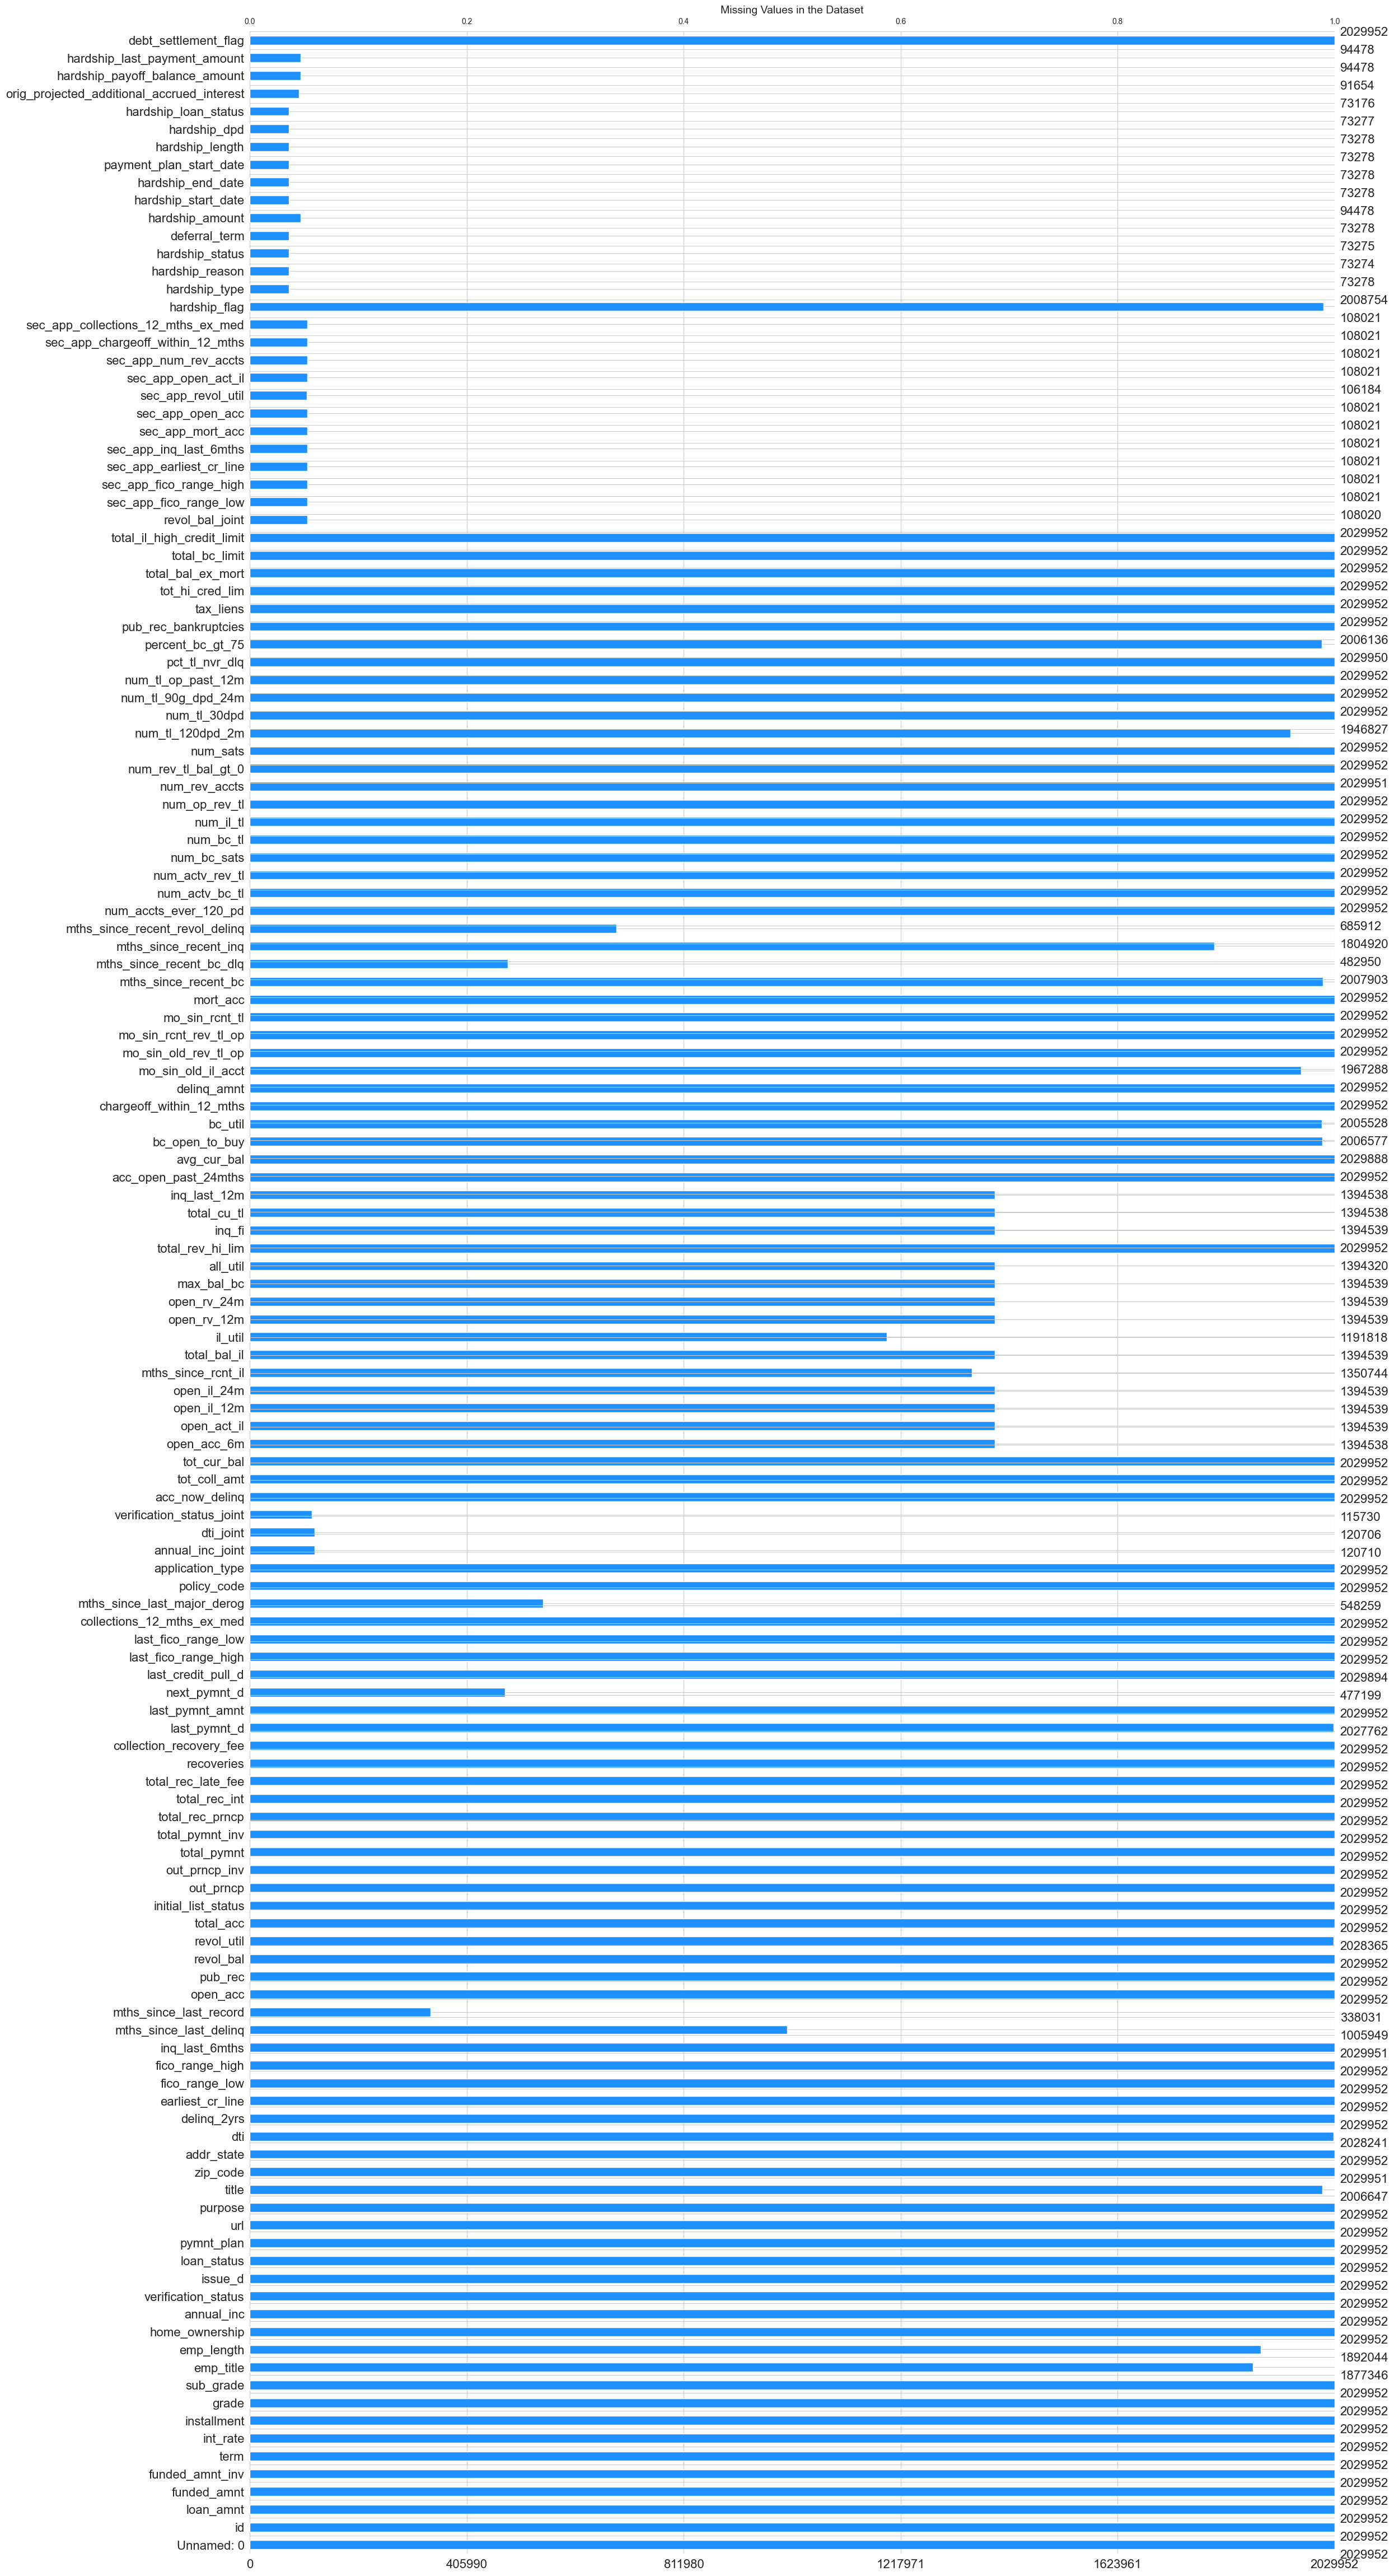

In [97]:
# Missing values per column (Relative)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100  # in %

# DataFrame (better visualization)
missing_data = pd.DataFrame({
    'Missing Values': missing_values, 
    'Percentage (%)': missing_percentage
})

# Here we keep only columns with missing data and sort them by percentage
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

# Summary
print(f"❗ Total Columns with Missing Values: {missing_data.shape[0]} out of {df.shape[1]} columns ({(missing_data.shape[0] / df.shape[1]) * 100:.2f}%)")
print(f"📌 Total Rows in Dataset: {df.shape[0]}\n")

# Top 15 columns with the most missing values
print("🔍 Top 15 Columns with Highest Missing Values:")
print(missing_data.head(15))

# Missing data as a Bar Chart for better visualization
plt.figure(figsize=(12,6))
msno.bar(df, color="dodgerblue")
plt.title("Missing Values in the Dataset", fontsize=14)
plt.show()


**Explanation:** The plot above, titled "Missing Values in the Dataset," provides a clear view of the variables with missing data, along with the percentage of missing values relative to the total dataset. As we can see, many variables have a significant amount of missing data. This observation suggests that some features will need to be removed, as they may not be useful for the model. 

(*See the next step for further details on data removal*.)


# **Step 2) Data Preparation**

In this step, I performed the necessary preprocessing tasks to ensure that the data is clean, well-structured, and ready for modeling. The key activities I undertook include:

- **Handling Missing Data**: Addressed any missing values to ensure a complete dataset.
- **Train/Test/Validation Split**: Divided the data into training, testing, and validation sets to evaluate the model's performance effectively.
- **Handling Categorical Variables**: Converted categorical variables into numerical formats suitable for machine learning models.
- **Outlier Detection and Removal**: Identified and dealt with outliers that could distort the model.
- **Feature Scaling**: Applied scaling techniques to ensure that all features contribute equally to the model.
- **Feature Selection**: Removed irrelevant or redundant features to improve model efficiency and focus on the most predictive variables.

These steps ensure that the dataset is ready for accurate and effective modeling.

---

## **2.1) Data Removal**

In this step, I removed features with too many missing values, as they can introduce noise and reduce model performance. By eliminating irrelevant features, I ensured the dataset focused on the most reliable information for the next steps.

---

### **2.1.1) Data Removal - Threshold of 40% Missing Data**

I removed features with more than 40% missing data, as they were deemed too unreliable for modeling.


In [98]:
# Set threshold at 40% missing data
threshold = 40  

# Find columns where missing percentage is greater than threshold
cols_to_drop = missing_data[missing_data["Percentage (%)"] > threshold].index

# Drop columns
df_cleaned = df.drop(columns=cols_to_drop)

print(f"❌ Dropped {len(cols_to_drop)} columns with more than {threshold}% missing values.")
print(f"✅ Remaining columns: {df_cleaned.shape[1]} out of {df.shape[1]}")


❌ Dropped 36 columns with more than 40% missing values.
✅ Remaining columns: 106 out of 142


 **Explanation:** With the code above, we removed all features that have more than 40% missing data. As a result, the dataset now contains 106 columns, having removed 36 columns. In the next step, we will further explore these remaining features to determine whether they should be kept, removed, or how to handle them appropriately.


In [99]:

# Here we recalculate the missing values after column removal
missing_values_new = df_cleaned.isnull().sum()
missing_percentage_new = (missing_values_new / len(df_cleaned)) * 100

# Afain, we create a DataFrame for better visualization
missing_data_new = pd.DataFrame({
    'Missing Values': missing_values_new, 
    'Percentage (%)': missing_percentage_new
})

# Here we keep only columns with missing data
missing_data_new = missing_data_new[missing_data_new['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

# Number of categorical and numerical features
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

print(f"📌 Remaining Columns: {df_cleaned.shape[1]}")
print(f"🔢 Numerical Features: {len(num_cols)}")
print(f"🔠 Categorical Features: {len(cat_cols)}")

# Top 15 columns with the most missing values
print("\n🔍 Top 15 Columns with Missing Values:")
print(missing_data_new.head(15))


📌 Remaining Columns: 106
🔢 Numerical Features: 82
🔠 Categorical Features: 24

🔍 Top 15 Columns with Missing Values:
                       Missing Values  Percentage (%)
mths_since_rcnt_il             679208        3345.93%
all_util                       635632        3131.27%
inq_last_12m                   635414        3130.19%
total_cu_tl                    635414        3130.19%
open_acc_6m                    635414        3130.19%
max_bal_bc                     635413        3130.19%
open_act_il                    635413        3130.19%
open_rv_24m                    635413        3130.19%
open_rv_12m                    635413        3130.19%
open_il_24m                    635413        3130.19%
open_il_12m                    635413        3130.19%
total_bal_il                   635413        3130.19%
inq_fi                         635413        3130.19%
mths_since_recent_inq          225032        1108.56%
emp_title                      152606         751.77%


**Explanation:** Afte the removal, we have 82 **Numerical Features** and 24 **Categorical Features**.

C:\Users\enric\AppData\Local\Temp\ipykernel_21832\1893514009.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\enric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


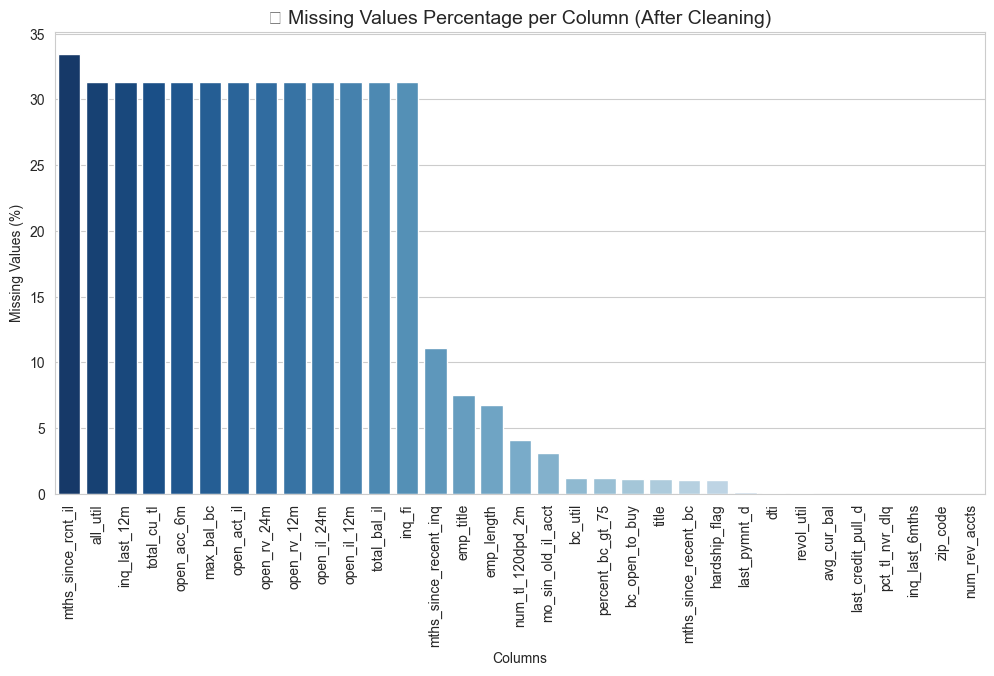

In [100]:
# Plot missing values in percentage (after removal)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=missing_data_new.index, 
    y=missing_data_new["Percentage (%)"], 
    palette="Blues_r"
)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Missing Values (%)")
plt.title("🔍 Missing Values Percentage per Column (After Cleaning)", fontsize=14)
plt.show()


**Explanation:** Again, as shown above, we plotted the graph to visualize the percentage of missing values after the removal of certain features. This helps us gain a clearer understanding of how much missing data remains and how it affects each feature in the dataset.


### **2.1.2) Data Removal - Quantitative Analysis: Correlation between Features**

In this step, I performed a quantitative analysis to assess the correlation between the features in the dataset. Features that are highly correlated with each other can lead to multicollinearity, which may affect the performance of certain models. By identifying and removing redundant features, I aimed to reduce noise and improve model efficiency,ensuring that only the variables with the most predictive power were retained for the next stages of the modeling process.

---

In [101]:
# Compute correlation matrix numerical features
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_cleaned[numerical_cols].corr()

# Features with high correlation (>98%)
threshold = 0.98
features_to_drop_corr = set()  # Use a set to avoid duplicates

for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col != idx and corr_matrix.loc[idx, col] > threshold:
            features_to_drop_corr.add(col)  

# Convert set to sorted list for better readability
features_to_drop_corr = sorted(features_to_drop_corr)

# Ensure we only drop existing columns
features_to_drop_existing = [col for col in features_to_drop_corr if col in df_cleaned.columns]

# Drop highly correlated features
df_cleaned = df_cleaned.drop(columns=features_to_drop_existing)

# Print Results
print(f"✅ Dropped {len(features_to_drop_existing)} highly correlated features (>{threshold*100}% correlation).")
print(f"📌 Remaining columns after removal: {df_cleaned.shape[1]}")
print("📉 Features removed due to high correlation:")
print(features_to_drop_existing)


✅ Dropped 15 highly correlated features (>98.0% correlation).
📌 Remaining columns after removal: 91
📉 Features removed due to high correlation:
['collection_recovery_fee', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'loan_amnt', 'num_actv_rev_tl', 'num_rev_tl_bal_gt_0', 'num_sats', 'open_acc', 'out_prncp', 'out_prncp_inv', 'recoveries', 'total_pymnt', 'total_pymnt_inv']



 **Explanation:** In this step, we remove features that **carry the same information** as others, making them redundant. By keeping only the **most informative feature in each pair**, we simplify the model **without losing predictive power**. This decision is based on our analysis of the correlation between features, where values above 98% indicate high redundancy.

 



### **2.1.3) Data Removal - Qualitative Analysis**

I removed certain features based on a **Qualitative Data Analysis**, where I evaluated the importance and relevance of each feature in the context of predicting loan defaults. Some features were judged to be irrelevant, either because they had too many missing values or because they provided little to no predictive value for assessing credit risk.

The removal process was guided by two key criteria:
1. **High Percentage of Missing Values** (Above 30% and low relevance)
2. **Low Predictive Relevance** (Features that do not contribute to predicting loan defaults)

However, the **most important criterion** for removal was based on **business logic**:
- If you were a bank, would you approve a loan **based on a link to the loan’s webpage (`url`)?** Clearly, no.
- Would you rather rely on **credit card utilization (`bc_util`)** or a single peak balance ever owed (`max_bal_bc`)? The former provides a much clearer view of a borrower’s financial habits.
- Some features, like **`hardship_flag`**, are only relevant **after a borrower defaults**, making them irrelevant for predicting defaults before they occur.

---

In [102]:
# Features removed because of our Qualitative Analysis 
features_to_drop = [
    "mths_since_rcnt_il",      
    "all_util",                
    "total_cu_tl",             
    "inq_fi",                  
    "Unnamed: 0",              
    "id",                     
    "url",                    
    "policy_code",            
    "title",                  
    "pymnt_plan",             
    "application_type",       
    "hardship_flag",          
    "debt_settlement_flag",   
    "last_fico_range_high",   
    "last_fico_range_low",    
    "max_bal_bc",             
    "mo_sin_old_rev_tl_op",   
    "num_bc_sats",            
    "num_bc_tl",              
    "num_rev_accts",          
    "addr_state",
    "total_pymnt",
    "total_rec_prncp",  
             
]

# Drop only the features that exist in the dataset
features_to_drop_existing = [col for col in features_to_drop if col in df_cleaned.columns]

# Drop from dataset
df_cleaned = df_cleaned.drop(columns=features_to_drop_existing)

# Print results
print(f"✅ Dropped {len(features_to_drop_existing)} features successfully.")
print(f"📌 Remaining columns after removal: {df_cleaned.shape[1]}")



✅ Dropped 22 features successfully.
📌 Remaining columns after removal: 69


**Features Removed:**

| **Feature**                    | **Why Remove It?**                                                                                                                                              |
|---------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **mths_since_rcnt_il** (33.5% missing)   | Measures months since the last installment loan. We already have `open_il_12m` and `open_il_24m`, which offer a better view of recent loan activity. Keeping both would be redundant. |
| **all_util** (31.3% missing)         | Measures total credit utilization across all accounts. We already have `bc_util` (credit card utilization) and `revol_util` (revolving credit utilization), which are more specific and directly related to risk assessment. |
| **total_cu_tl** (31.3% missing)     | Represents total credit union trades. Most lending decisions are based on commercial banking data, making this feature less relevant for general lending models. |
| **inq_fi** (31.3% missing)          | Measures the number of finance inquiries, but we already have `inq_last_6mths` and `inq_last_12m`, which provide the same information in a more structured way. |
| **max_bal_bc** (31.3% missing)     | Shows the highest balance ever owed on a credit card. A single peak balance is not as useful as `bc_util`, which tracks ongoing utilization and is a stronger predictor of financial behavior. |
| **Unnamed: 0**                    | Just an **index column**, no predictive value.                                                                                                                 |
| **id**                            | A unique identifier for each loan. Does not provide any useful insight into credit risk or loan performance.                                                  |
| **url**                           | A link to the loan listing, completely irrelevant for credit assessment.                                                                                      |
| **policy_code**                   | Almost always the same value, meaning it has no variance and does not contribute to predicting loan performance.                                                |
| **title**                         | Loan titles are self-reported and inconsistent. The `purpose` feature already captures the intended use of the loan in a more structured format.               |
| **pymnt_plan**                    | Almost always `"n"`, meaning no payment plan. Since it rarely changes, it does not provide any meaningful insight.                                              |
| **application_type**              | Indicates whether the application is individual or joint, but most loans are individual, making this feature low-impact.                                        |
| **hardship_flag**                 | Only applies after a borrower is already in financial distress. Since we want to predict default before it happens, this feature is not useful.                |
| **debt_settlement_flag**          | Similar to `hardship_flag`, it only applies after financial issues arise, so it does not help predict creditworthiness before default.                         |
| **last_fico_range_high & last_fico_range_low** | These show **the last recorded FICO score before default**, which may introduce **data leakage** (i.e., the model should predict default before it happens). |
| **mo_sin_old_rev_tl_op**          | Represents the **months since the oldest revolving account was opened**, but we already have `earliest_cr_line`, which provides the same information in a better format. |
| **num_bc_sats**                   | This counts the number of **satisfactory credit card accounts**, but **open_acc already includes all active accounts**, making this feature redundant.          |
| **num_bc_tl**                     | This counts **the number of bank credit cards**, but **num_op_rev_tl** already tracks open revolving accounts, which are more relevant for credit behavior.   |
| **num_rev_accts**                 | Another feature tracking **revolving accounts**, which overlaps with `num_op_rev_tl`.                                                                        |
| **addr_state**                    | A borrower’s **state does not strongly influence default probability**. Location may introduce unnecessary bias rather than meaningful patterns.                 |
| **total_pymnt**                   | Shows total payments made, but is redundant when compared with `total_pymnt_inv` and already covered by `total_rec_prncp`, which tracks payment progress more directly. |
| **total_rec_prncp**               | Similar to `total_pymnt`, this shows the total principal payments made but doesn’t add much value in predicting loan defaults on its own.                       |

---


### **2.1.4) Data Removal - Check for Low-Variance Features**

Just like highly correlated features, low-variance features, where most values are the same, provide little value for machine learning models. They don’t help differentiate between loan defaults and non-defaults, adding unnecessary complexity and slowing down training. These features can also lead to overfitting.

Removing them simplifies the model, boosts training efficiency, and reduces overfitting risk.

---


In [103]:
# Check unique values per feature
low_variance_features = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]

print(f"📌 Features with low variance (single unique value): {low_variance_features}")


📌 Features with low variance (single unique value): []


 **Explanation:** All feature are relevant, we don't need to drop any feature.

In [104]:
# ✅ Define Closed Loans (0 = Fully Paid, 1 = Defaulted)
df_closed = df_cleaned[df_cleaned["loan_status"].isin([0, 1])].copy()

# ✅ Open loans don't exist in your dataset
df_open = df_cleaned[~df_cleaned["loan_status"].isin([0, 1])].copy()  # Should be empty

# ✅ Convert loan_status to binary (if not already done)
df_closed["loan_status"] = df_closed["loan_status"].apply(lambda x: 1 if x == 1 else 0)

# ✅ Check dataset distribution
print("Target Variable (y) Distribution:")
print(df_closed["loan_status"].value_counts())

# ✅ Show first few rows
print("\n First few rows of the dataset after filtering:")
print(df_closed[["loan_status"]].head())

# ✅ Verify Open Loans
print("✅ Closed Loans:", df_closed.shape)
print("✅ Open Loans:", df_open.shape)  


Target Variable (y) Distribution:
Series([], Name: count, dtype: int64)

 First few rows of the dataset after filtering:
Empty DataFrame
Columns: [loan_status]
Index: []
✅ Closed Loans: (0, 69)
✅ Open Loans: (2029952, 69)


### **2.2) Train/Test/Valdiate Split**

In this step, I split the dataset into three subsets: Training (80%), Validation (10%), and Test (10%). The Training set is used to train the model, the Validation set helps in tuning hyperparameters and preventing overfitting, and the Test set is reserved for evaluating the final model performance. I used stratified sampling to ensure the distribution of the target variable ("loan_status") is consistent across all subsets.

**Note:** the sample was high enough (>100.000) this is why I split the data into this: 80-10-10.

----

In [105]:
# ✅ Define the target variable (1 = Defaulted, 0 = Fully Paid)
df_cleaned["loan_status"] = df_cleaned["loan_status"].apply(lambda x: 1 if "Charged Off" in str(x) else 0)

# ✅ Filter only CLOSED loans 
df_closed_loans = df_cleaned[df_cleaned["loan_status"].isin([0, 1])]

# ✅ Define features and target
X = df_closed_loans.drop(columns=["loan_status"])  # Features
y = df_closed_loans["loan_status"]  # Target

# ✅ Define Feature Categories
ordinal_features = ["sub_grade", "verification_status"]
nominal_features = ["home_ownership", "hardship_flag", "debt_settlement_flag"]
numerical_features = X.select_dtypes(include=["number"]).columns.tolist()

# ✅ Ensure "loan_status" is not mistakenly in numerical features
if "loan_status" in numerical_features:
    numerical_features.remove("loan_status")

# ✅ Split the data
# First, split into Train (80%) and Temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Then, split Temp into Validation (10%) and Test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# ✅ Print dataset shapes
print(f"✅ Train Set: {X_train.shape}, {y_train.shape}")
print(f"✅ Validation Set: {X_val.shape}, {y_val.shape}")
print(f"✅ Test Set: {X_test.shape}, {y_test.shape}")




✅ Train Set: (1623961, 68), (1623961,)
✅ Validation Set: (202995, 68), (202995,)
✅ Test Set: (202996, 68), (202996,)


**Explanation:** Above, you can see the train, validation, and test sets. First, I removed irrelevant data, then performed the split to ensure that the model is trained on one subset, validated on another, and tested on a separate one. This process helps prevent data leakage and ensures an unbiased evaluation of model performance. 

(*Note I filtered the data only for Closed loans)*


### **2.3) Handle Categorical Variables**

In this step, I addressed the handling of categorical variables, which is essential for proper feature encoding. Before encoding, I first handled any missing values to avoid introducing biases through string-based imputation. This ensures the encoding process accurately reflects the dataset and prepares categorical features for the model.

---


In [106]:
# Categorical columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

# Unique values for each categorical feature
for col in X_train.select_dtypes(include=["object"]).columns:
    unique_values = X_train[col].unique()
    print(f"📌 {col}: {len(unique_values)} unique values\n{unique_values[:20]}\n{'-'*50}")


📌 term: 2 unique values
[' 36 months' ' 60 months']
--------------------------------------------------
📌 int_rate: 309 unique values
[' 13.33%' ' 10.42%' '  9.44%' ' 11.44%' ' 11.06%' '  5.32%' ' 12.49%'
 '  7.89%' ' 18.99%' ' 13.56%' '  7.39%' ' 12.99%' ' 13.67%' '  6.11%'
 ' 16.99%' ' 11.98%' ' 11.67%' ' 10.91%' ' 18.25%' ' 12.74%']
--------------------------------------------------
📌 grade: 7 unique values
['C' 'B' 'A' 'D' 'E' 'G' 'F']
--------------------------------------------------
📌 sub_grade: 35 unique values
['C3' 'B3' 'B1' 'B4' 'A1' 'B5' 'A5' 'D3' 'C1' 'A4' 'C2' 'E1' 'C4' 'C5'
 'B2' 'A2' 'D1' 'A3' 'E3' 'E5']
--------------------------------------------------
📌 emp_title: 328879 unique values
['TSA' 'OFFICE MANAGER' 'TREASURY ANALYST' 'Clerk' 'Carrier' 'ADC Analyst'
 'clerk' 'Configuration Engineer' 'T-3 DIESEL TECH' 'Program Coordinator'
 'Information Technology Manager' 'Sales'
 'Client Implementation Consultant' 'Operations Admin' 'Security Officer'
 'Instructor & Executiv

**Explanation:** The output above shows all the categorical variables from `X_train` and their possible outcomes (unique values). I reviewed each variable to fully understand its distribution, allowing us to decide how to handle each categorical feature appropriately.


### **2.3.1) Categorical Variables - Ordinal Variables**

----

In [107]:
# Label Encoding for ordinal variables
ordinal_cols = ["term", "grade", "sub_grade", "emp_length"]

for col in ordinal_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_val[col] = le.transform(X_val[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

print("✅ Ordinal variables encoded with Label Encoding.")


✅ Ordinal variables encoded with Label Encoding.


**Explanation:**  The categorical features above have a **clear ranking or order**. So I handled them using Label Encoding: 

 **1️⃣ `term` (Loan Term Length)**
- The values are `"36 months"` and `"60 months"`.  
- A **60-month loan term carries more risk than a 36-month loan** because it's a longer commitment.  
- Assigning `"36 months" = 0` and `"60 months" = 1` preserves this relationship.

 **2️⃣ `grade` (Loan Grade Assigned by Lender)**
- Loan grades range from `"A"` (best) to `"G"` (worst).  
- A borrower with a **Grade A loan is lower risk than a Grade G borrower**.  
- Assigning `"A" = 0`, `"B" = 1`, `"C" = 2"`, ..., `"G" = 6` maintains this ranking.

 **3️⃣ `sub_grade` (More Detailed Loan Grade)**
- Each grade (`A` to `G`) has subcategories (`A1`, `A2`, ..., `G5`).  
- `"A1"` is better than `"A2"`, `"B1"` is better than `"B2"`, and so on.  
- Label encoding keeps the **ranking intact**, so `"A1"` < `"A2"` < `"B1"` < `"B2"`, etc.

 **4️⃣ `emp_length` (Years of Employment)**
- The values range from `"<1 year"` to `"10+ years"`.  
- More years of employment **generally means more financial stability**.  
- Assigning `"<1 year" = 0`, `"1 year" = 1`, ..., `"10+ years" = 10"` ensures that the order is respected.



### **2.3.2) Categorical Variables - Nominal Variables**

----

In [108]:
# One-Hot Encoding for nominal variables
nominal_cols = ["home_ownership", "verification_status", "purpose", "initial_list_status"]

X_train = pd.get_dummies(X_train, columns=nominal_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=nominal_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=nominal_cols, drop_first=True)

print("✅ Nominal variables encoded with One-Hot Encoding.")


✅ Nominal variables encoded with One-Hot Encoding.


**Explanation:** For categorical variables without an inherent order (nominal variables), I applied **One-Hot Encoding**. This transforms categorical data into binary columns (0 or 1), ensuring the model treats each category independently without assuming any ranking or relationship.

 **1️⃣ `home_ownership` (Type of Housing Situation)**
- Possible values: `"RENT"`, `"MORTGAGE"`, `"OWN"`, `"ANY"`, `"NONE"`.  
- Since no type of home ownership is inherently "greater" than another, these values are treated as distinct categories.  
- One-Hot Encoding creates a separate binary column for each category.

**2️⃣ `verification_status` (Income Verification Status)**
- Possible values: `"Verified"`, `"Not Verified"`, `"Source Verified"`.  
- These values have no inherent ranking, so each is represented as a separate column through One-Hot Encoding.

 **3️⃣ `purpose` (Reason for the Loan)**
- Possible values include `"debt_consolidation"`, `"credit_card"`, `"home_improvement"`, `"vacation"`, `"small_business"`, and more.  
- As each loan purpose is distinct, One-Hot Encoding enables the model to treat them as independent categories.

 **4️⃣ `initial_list_status` (Loan Listing Type)**
- Possible values: `"w"` and `"f"`.  
- Since there are only two values, we convert this feature into a single binary column.






### **2.3.3) Categorical Variables - Date Variables**

---


In [109]:

# Date column variables
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]

# Only process existing date columns
existing_date_cols = [col for col in date_cols if col in X_train.columns]

# Convert to datetime format safely
for col in existing_date_cols:
    X_train[col] = pd.to_datetime(X_train[col], format="%b-%Y", errors="coerce")
    X_val[col] = pd.to_datetime(X_val[col], format="%b-%Y", errors="coerce")
    X_test[col] = pd.to_datetime(X_test[col], format="%b-%Y", errors="coerce")

# Capture the current date for calculations
current_date = datetime.today()

# Convert date features into numerical values
if "issue_d" in existing_date_cols:
    X_train["issue_year"] = X_train["issue_d"].dt.year
    X_val["issue_year"] = X_val["issue_d"].dt.year
    X_test["issue_year"] = X_test["issue_d"].dt.year

if "earliest_cr_line" in existing_date_cols:
    X_train["months_since_credit_line"] = (current_date - X_train["earliest_cr_line"]).dt.days // 30
    X_val["months_since_credit_line"] = (current_date - X_val["earliest_cr_line"]).dt.days // 30
    X_test["months_since_credit_line"] = (current_date - X_test["earliest_cr_line"]).dt.days // 30

if "last_pymnt_d" in existing_date_cols:
    X_train["months_since_last_payment"] = (current_date - X_train["last_pymnt_d"]).dt.days // 30
    X_val["months_since_last_payment"] = (current_date - X_val["last_pymnt_d"]).dt.days // 30
    X_test["months_since_last_payment"] = (current_date - X_test["last_pymnt_d"]).dt.days // 30

if "last_credit_pull_d" in existing_date_cols:
    X_train["months_since_last_credit_pull"] = (current_date - X_train["last_credit_pull_d"]).dt.days // 30
    X_val["months_since_last_credit_pull"] = (current_date - X_val["last_credit_pull_d"]).dt.days // 30
    X_test["months_since_last_credit_pull"] = (current_date - X_test["last_credit_pull_d"]).dt.days // 30

# Drop original date columns after transformation
X_train.drop(columns=existing_date_cols, inplace=True, errors="ignore")
X_val.drop(columns=existing_date_cols, inplace=True, errors="ignore")
X_test.drop(columns=existing_date_cols, inplace=True, errors="ignore")

# Verify transformation
print("✅ Date variables successfully converted to numerical format.")
print(f"📌 Features after conversion: {X_train.columns.tolist()}")
print(f"🟡 Remaining missing values in date-related columns:")
print(X_train[["issue_year", "months_since_credit_line", "months_since_last_payment", "months_since_last_credit_pull"]].isnull().sum())





✅ Date variables successfully converted to numerical format.
📌 Features after conversion: ['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'annual_inc', 'zip_code', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'total_rev_hi_lim', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', '

In [110]:
X_train.drop(columns=["issue_year"], inplace=True, errors="ignore")
X_val.drop(columns=["issue_year"], inplace=True, errors="ignore")
X_test.drop(columns=["issue_year"], inplace=True, errors="ignore")
print("✅ Dropped issue_year successfully.")


✅ Dropped issue_year successfully.


**Explanation:** in this step, I convertED the date-related columns into numerical values, making them usable for the models. By converting dates into numerical values, I ensured that the model can interpret and utilize these temporal features for predictions.


### **2.3.4) Categorical Variables - High Cardinality Variables**

---

In [111]:
X_train.drop(columns=["emp_title", "zip_code"], inplace=True)
X_val.drop(columns=["emp_title", "zip_code"], inplace=True)
X_test.drop(columns=["emp_title", "zip_code"], inplace=True)

print("✅ Dropped high-cardinality variables (`emp_title`, `zip_code`).")


✅ Dropped high-cardinality variables (`emp_title`, `zip_code`).


**Explanation:** Finally I decided to drop the categorical variables that have too many unique values, which could increase model complexity. In this case:
- emp_title → Too many categories, low predictive power
- zip_code → ZIP code is not be relevant for default prediction

## **2.4) Convert Percentage Strings to Numeric Values**

In this step, I converted percentage strings (e.g., "25%") into numeric values (e.g., 0.25) to ensure they can be used in numerical calculations. This transformation is important for handling data properly, allowing the model to process percentages correctly.

----

In [112]:
# Convert percentage strings to float (remove '%' and divide by 100)
for col in ["int_rate", "revol_util"]:
    X_train[col] = X_train[col].str.replace("%", "").astype(float) / 100
    X_val[col] = X_val[col].str.replace("%", "").astype(float) / 100
    X_test[col] = X_test[col].str.replace("%", "").astype(float) / 100

print("✅ Percentage variables transformed to numeric values.")


✅ Percentage variables transformed to numeric values.


## **2.5) Handle Missing Values**

In this step, I aimed to Handle the features with missing values

---  

In [113]:
# Missing value percentage in Train Set
missing_values = X_train.isnull().mean() * 100

# Features with missing values
missing_features = missing_values[missing_values > 0].sort_values(ascending=False)
missing_features

open_acc_6m                     3127.96%
inq_last_12m                    3127.96%
open_il_12m                     3127.96%
open_rv_12m                     3127.96%
open_il_24m                     3127.96%
open_act_il                     3127.96%
open_rv_24m                     3127.96%
total_bal_il                    3127.96%
mths_since_recent_inq           1108.48%
num_tl_120dpd_2m                 410.32%
mo_sin_old_il_acct               308.70%
bc_util                          119.95%
percent_bc_gt_75                 116.99%
bc_open_to_buy                   114.77%
mths_since_recent_bc             108.27%
months_since_last_payment         10.99%
dti                                8.45%
revol_util                         7.81%
avg_cur_bal                        0.30%
months_since_last_credit_pull      0.28%
pct_tl_nvr_dlq                     0.01%
inq_last_6mths                     0.01%
dtype: float64

In [114]:
# Identify features with missing values dynamically
missing_values = X_train.isnull().sum()
missing_percent = (missing_values / len(X_train)) * 100  # %

# threshold (5%) to classify missing features
threshold = 5.0 

high_missing_features = missing_percent[missing_percent > threshold].index.tolist()
low_missing_features = missing_percent[(missing_percent > 0) & (missing_percent <= threshold)].index.tolist()

print(f"🔹 High missing features (> {threshold}% missing): {high_missing_features}")
print(f"🔹 Low missing features (≤ {threshold}% missing): {low_missing_features}")

#Apply Median Imputation for High Missing Features
if high_missing_features:
    median_imputer = SimpleImputer(strategy="median")
    X_train[high_missing_features] = median_imputer.fit_transform(X_train[high_missing_features])
    X_val[high_missing_features] = median_imputer.transform(X_val[high_missing_features])
    X_test[high_missing_features] = median_imputer.transform(X_test[high_missing_features])

# Apply Mean Imputation for Low Missing Features
if low_missing_features:
    mean_imputer = SimpleImputer(strategy="mean")
    X_train[low_missing_features] = mean_imputer.fit_transform(X_train[low_missing_features])
    X_val[low_missing_features] = mean_imputer.transform(X_val[low_missing_features])
    X_test[low_missing_features] = mean_imputer.transform(X_test[low_missing_features])

# Final Check
print("✅ Final Missing Values in Train Set:", X_train.isnull().sum().sum())
print("✅ Final Missing Values in Validation Set:", X_val.isnull().sum().sum())
print("✅ Final Missing Values in Test Set:", X_test.isnull().sum().sum())



🔹 High missing features (> 5.0% missing): ['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'inq_last_12m', 'mths_since_recent_inq']
🔹 Low missing features (≤ 5.0% missing): ['dti', 'inq_last_6mths', 'revol_util', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mths_since_recent_bc', 'num_tl_120dpd_2m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'months_since_last_payment', 'months_since_last_credit_pull']
✅ Final Missing Values in Train Set: 0
✅ Final Missing Values in Validation Set: 0
✅ Final Missing Values in Test Set: 0


**Explanation:** Before deciding how to handle missing values, I analyzed whether the affected features were **qualitatively relevant** to predicting loan defaults. All features with missing data provided **meaningful financial insights**, such as **credit inquiries, loan balances, utilization rates, and time since key financial events**. Since these variables contribute to **creditworthiness assessment**, we **did not drop any features** and instead applied **targeted imputation strategies**.

I designed a **systematic imputation approach** by **setting a threshold** of **5% missing values** to classify features.  
- **Median imputation** was applied to features with **high missing percentages (>5%)** because it is **robust against outliers**. Features like **account balances, credit inquiries, and total balances** tend to be **right-skewed** due to some borrowers having exceptionally high values, making the median a more stable imputation method.  
- **Mean imputation** was used for features with **low missing percentages (≤5%)**, as it **works best when data is normally distributed** with no extreme skew. Features like **debt-to-income ratio (DTI), utilization rates, and credit limits** tend to be **normally distributed**, so using the **mean ensures that data remains representative** of its natural distribution.  

All missing values were handled **dynamically** based on **data characteristics** to maintain **data integrity and consistency**.  




## **2.6) Outlier Detection & Handling**

In this step, I aimed to determine the Outliers, and the best way to handle them.

----

### **2.6.1) Outliers - Visual Analysis (Histograms & Box Plots)**
---

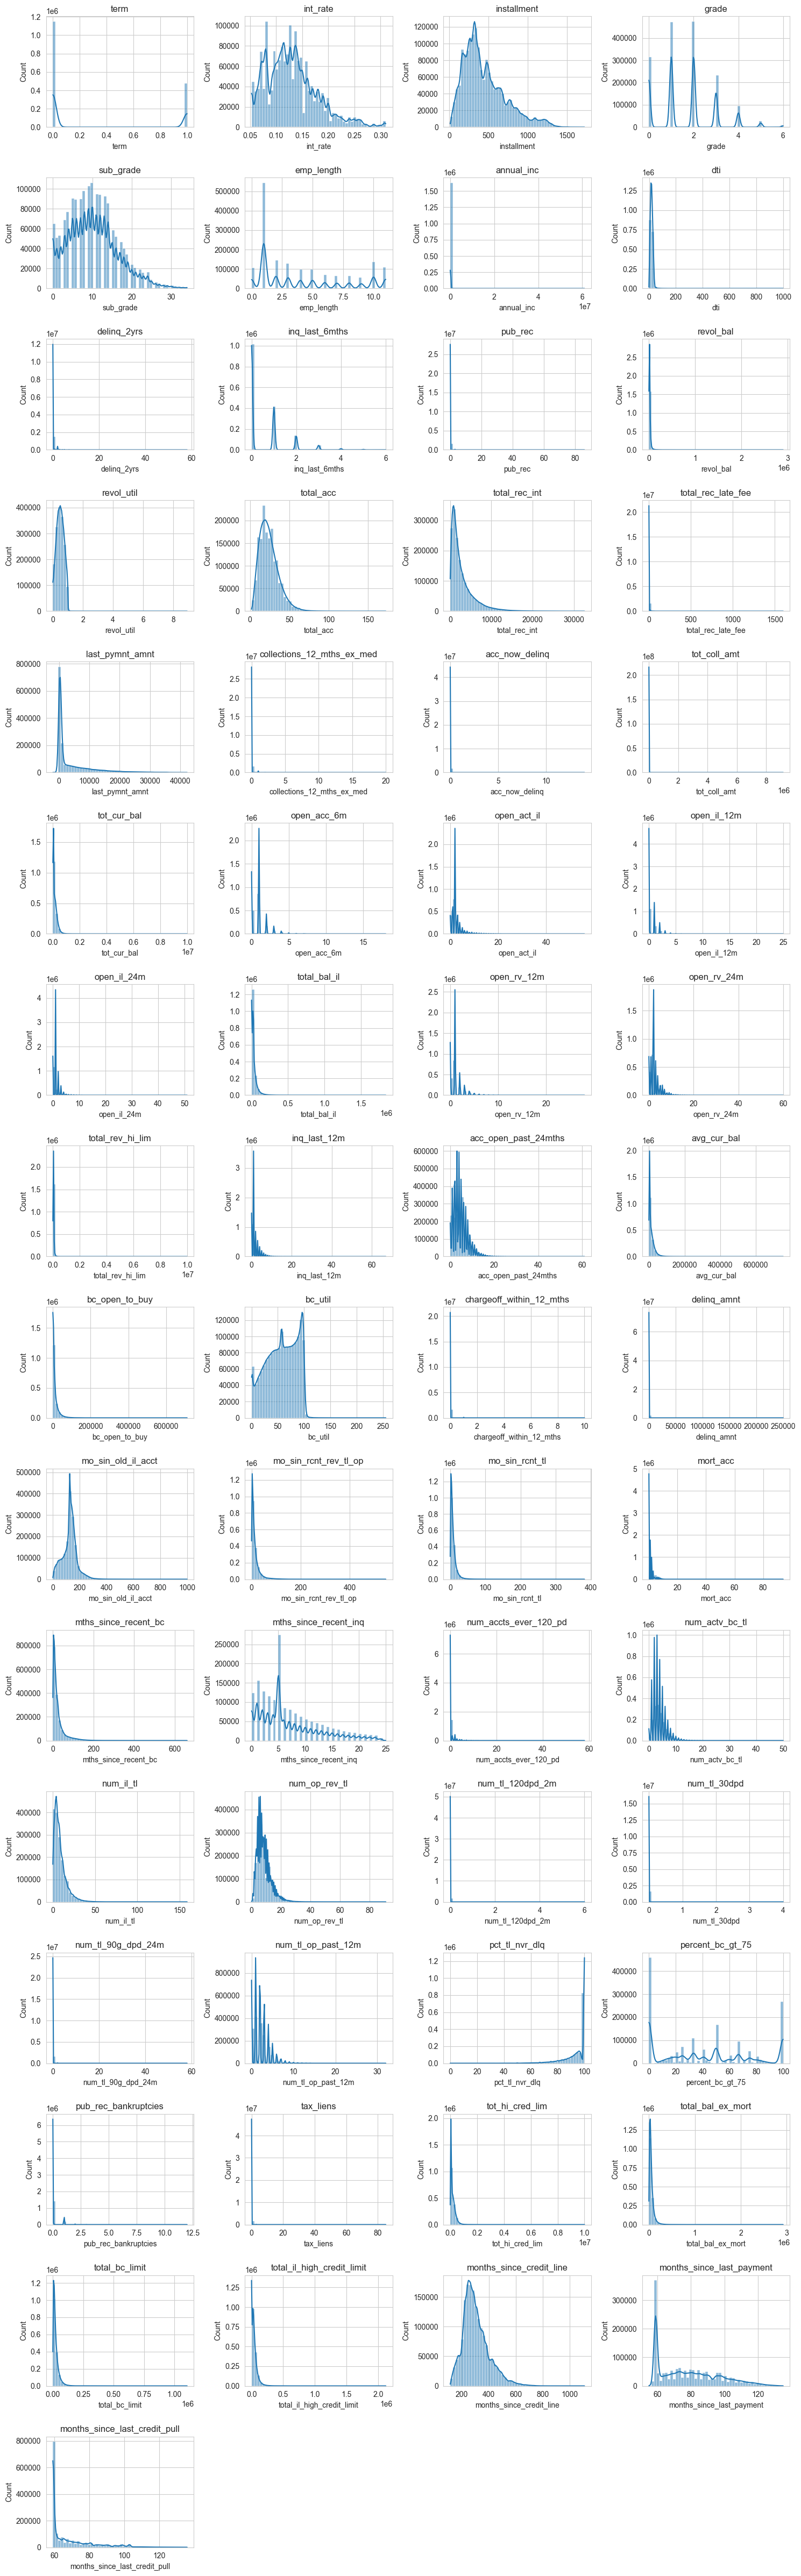

In [115]:
import math

# Select all numerical features
num_features = X_train.select_dtypes(include=["float64", "int64"]).columns

# Number of rows and columns dyna
num_plots = len(num_features)
num_cols = 4  # max of 4 columns per row
num_rows = math.ceil(num_plots / num_cols)  # Calculate needed rows

# Plot histograms for all numerical features
plt.figure(figsize=(15, num_rows * 3))
for i, col in enumerate(num_features, 1):  
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(X_train[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


**Explanation:** 

Plotting each feature helps us visually inspect its distribution and identify outliers. 

✅ A bell-shaped histogram indicates a normal distribution.  
✅ A skewed histogram suggests the feature has a long tail on one side.


### **2.6.2) Outliers - Quantitative Analysis**

Instead of relying solely on visualization, we can compute skewness values and detect outliers using the **Z-score** or **IQR** methods.

---

#### **2.6.2.1) Skwwness Computation**


- If skewness is close to 0 (between **-0.5** and **0.5**), the feature is **normally distributed**.
- If skewness is **higher** than **0.5** (positive skew) or **lower** than **-0.5** (negative skew), the feature is **skewed**.

----

In [116]:
# Compute skewness for each numerical column
skewness = X_train.select_dtypes(include=["float64", "int64"]).skew().sort_values(ascending=False)

# Convert skewness to DataFrame and display the top features
skewness_df = pd.DataFrame(skewness, columns=["Skewness"])
print(skewness_df)



                    Skewness
tot_coll_amt       87663.75%
annual_inc         21160.34%
delinq_amnt        10111.32%
num_tl_120dpd_2m    5130.81%
tax_liens           3061.02%
...                      ...
mo_sin_old_il_acct    35.56%
percent_bc_gt_75      35.30%
revol_util             5.92%
bc_util              -23.54%
pct_tl_nvr_dlq      -226.09%

[61 rows x 1 columns]


#### **2.6.2.2) Outlier Detection: Z-Score Threshold & IQR Method**

The method I used for detecting outliers are : **Z-Score** and **IQR**. The Z-Score method is applied to features that are normally distributed, such as `revol_util`, `bc_util`, and `mo_sin_old_il_acct`. I used a stricter Z-Score threshold of 2.5, compared to the usual threshold of 3. This stricter threshold helps to remove only strong deviations in the data, ensuring that only the most extreme outliers are flagged.

For features that exhibit skewed data, the **IQR method** is applied to all other numerical features. This method uses the standard 2.5×IQR rule to identify outliers (also more strict than the convention 1.5). The IQR method is particularly effective for financial data, where outliers are common but should be treated with caution.

----

                      Feature  Outliers Detected  Outlier % Method Used
42      num_accts_ever_120_pd             379749   2338.41%         IQR
11                delinq_2yrs             309441   1905.47%         IQR
13                    pub_rec             270483   1665.58%         IQR
21               tot_coll_amt             255808   1575.21%         IQR
52       pub_rec_bankruptcies             203937   1255.80%         IQR
..                        ...                ...        ...         ...
7                   sub_grade                  0      0.00%         IQR
4                    int_rate                  0      0.00%         IQR
41      mths_since_recent_inq                  0      0.00%         IQR
51           percent_bc_gt_75                  0      0.00%         IQR
59  months_since_last_payment                  0      0.00%         IQR

[61 rows x 4 columns]


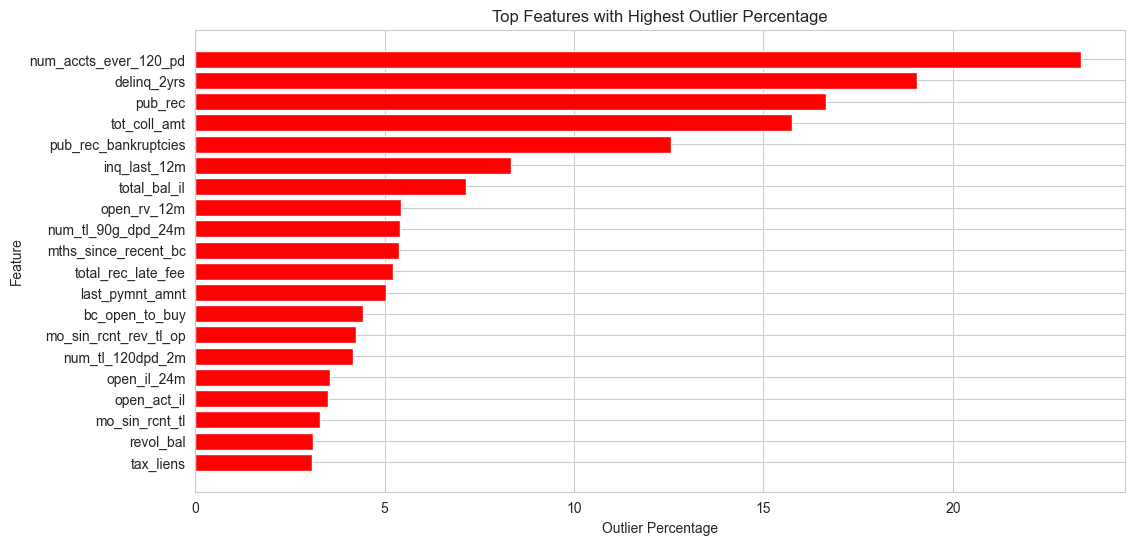

In [117]:
# Strict Thresholds
z_threshold = 2.5  # Stricter than usual (common is 3)
iqr_multiplier = 2.5  # Strict IQR rule

# Features assigned to Z-Score (Normally Distributed)
zscore_features = ["revol_util", "bc_util", "mo_sin_old_il_acct"]

# Features assigned to IQR (Skewed Features)
iqr_features = [col for col in X_train.select_dtypes(include=["float64", "int64"]).columns if col not in zscore_features]

# Detect Outliers Using Z-Score
z_scores = np.abs(X_train[zscore_features].apply(lambda x: (x - x.mean()) / x.std()))
z_outliers = (z_scores > z_threshold).sum()

# Detect Outliers Using IQR
Q1 = X_train[iqr_features].quantile(0.25)
Q3 = X_train[iqr_features].quantile(0.75)
IQR = Q3 - Q1

iqr_outliers = ((X_train[iqr_features] < (Q1 - iqr_multiplier * IQR)) | (X_train[iqr_features] > (Q3 + iqr_multiplier * IQR))).sum()

# Total number of rows in training data
total_rows = X_train.shape[0]

# Convert to NumPy arrays before division
outlier_counts = pd.DataFrame({
    "Feature": z_outliers.index.tolist() + iqr_outliers.index.tolist(),
    "Outliers Detected": z_outliers.values.tolist() + iqr_outliers.values.tolist(),  # Convert to list
    "Outlier %": (np.array(z_outliers.values.tolist() + iqr_outliers.values.tolist()) / total_rows) * 100,  # Convert to array
    "Method Used": ["Z-Score"] * len(z_outliers) + ["IQR"] * len(iqr_outliers)
}).sort_values(by="Outlier %", ascending=False)

# Display Outlier Counts with Percentage
print(outlier_counts)

# Plot Top Features with Highest Outlier Percentage
plt.figure(figsize=(12, 6))
plt.barh(outlier_counts["Feature"][:20], outlier_counts["Outlier %"][:20], color="red")
plt.xlabel("Outlier Percentage")
plt.ylabel("Feature")
plt.title("Top Features with Highest Outlier Percentage")
plt.gca().invert_yaxis()  # Highest at the top
plt.show()




#### **2.6.2.3) Outlier Removal**

Based on the Z-Score and IQR methods, I removed the outliers identified in the previous step. For features that were normally distributed, the Z-Score method flagged extreme values beyond a threshold of 2.5, while for skewed features, the IQR method captured outliers using the standard 1.5×IQR rule. By removing these outliers, I ensured the model is trained on more relevant data, improving its performance and reducing the risk of overfitting from extreme, unrepresentative values.

---

In [118]:

numerical_features = X_train.select_dtypes(include=["float64", "int64"]).columns

# Cap extreme values dynamically at 1st and 99th percentiles
for col in numerical_features:
    lower_bound = X_train[col].quantile(0.01)
    upper_bound = X_train[col].quantile(0.99)
    
    X_train[col] = np.clip(X_train[col], lower_bound, upper_bound)
    X_val[col] = np.clip(X_val[col], lower_bound, upper_bound)
    X_test[col] = np.clip(X_test[col], lower_bound, upper_bound)

print("✅ Extreme values capped at 1st and 99th percentiles for all numerical features.")



✅ Extreme values capped at 1st and 99th percentiles for all numerical features.


##### **Case 1: > 10% Outliers:** 
Features with more than 10% outliers, such as `out_prncp` (23.16%) and `recoveries` (11.20%), are handled differently. Instead of removing these features entirely, I chose to apply **Winsorization**, which involves capping extreme values at the 1st and 99th percentiles. This method helps preserve the potentially meaningful information from extreme values, rather than discarding them as outliers. By capping the outliers, we maintain the integrity of the data while reducing the impact of extreme values that may not necessarily represent noise.


In [119]:


numerical_features = X_train.select_dtypes(include=["float64", "int64"]).columns

# Cap extreme values dynamically at 5th and 95th percentiles
for col in numerical_features:
    lower_bound = X_train[col].quantile(0.05)
    upper_bound = X_train[col].quantile(0.95)
    
    X_train[col] = np.clip(X_train[col], lower_bound, upper_bound)
    X_val[col] = np.clip(X_val[col], lower_bound, upper_bound)
    X_test[col] = np.clip(X_test[col], lower_bound, upper_bound)

print("✅ Extreme values capped at 5th and 95th percentiles for all numerical features.")


✅ Extreme values capped at 5th and 95th percentiles for all numerical features.


##### **Case 2: 2% - 10% Outliers:**

Features with 2% to 10% outliers, such as `inq_last_12m` (8.32%), `total_bal_il` (7.13%), `mths_since_recent_bc` (5.37%), and others, are capped at the 5th and 95th percentiles. These features exhibit moderate skewness and high variance, so capping the outliers at these percentiles helps prevent extreme values from distorting the model. This approach allows us to preserve the valuable information from these features while reducing the impact of extreme values that could lead to overfitting or bias.


##### **Case 3: 0% - 2% Outliers:**

Features with 0% to 2% outliers, such as `tot_hi_cred_lim` (1.06%), `num_il_tl` (1.62%), and others, are kept as they are. These outlier percentages are minimal, with most being under 1%, so there’s no need for modification. The outliers in these features have a negligible impact on the model, and removing or altering them would introduce unnecessary changes to the data.


## **2.7) Feature Scaling**

Feature scaling is crucial in machine learning to ensure all features contribute equally to the model. Without scaling, features with larger values can dominate the learning process, leading to biased predictions. Scaling also speeds up optimization by providing a uniform scale and prevents models from favoring one feature due to its scale, such as income in thousands versus interest rates as percentages.

----





In [120]:
# Define threshold for normal distribution
zscore_threshold = 0.5  # Features with skewness between -0.5 and 0.5 are considered normal 

# Automatically assign features based on precomputed skewness
standardize_features = skewness[(-zscore_threshold <= skewness) & (skewness <= zscore_threshold)].index.tolist()
normalize_features = skewness[(skewness < -zscore_threshold) | (skewness > zscore_threshold)].index.tolist()

# Ensure only existing features are included
existing_standard_features = [col for col in standardize_features if col in X_train.columns]
existing_normalize_features = [col for col in normalize_features if col in X_train.columns]

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply scaling on Training Set
X_train[existing_standard_features] = scaler_standard.fit_transform(X_train[existing_standard_features])
X_train[existing_normalize_features] = scaler_minmax.fit_transform(X_train[existing_normalize_features])

# Apply the same transformation on Validation and Test Set
X_val[existing_standard_features] = scaler_standard.transform(X_val[existing_standard_features])
X_val[existing_normalize_features] = scaler_minmax.transform(X_val[existing_normalize_features])

X_test[existing_standard_features] = scaler_standard.transform(X_test[existing_standard_features])
X_test[existing_normalize_features] = scaler_minmax.transform(X_test[existing_normalize_features])

# Print Summary
print(f"✅ Standardized Features (Z-Score): {len(existing_standard_features)}")
print(f"✅ Normalized Features (MinMax): {len(existing_normalize_features)}")
print("📌 Feature Scaling Applied Automatically Based on Skewness.")

✅ Standardized Features (Z-Score): 4
✅ Normalized Features (MinMax): 57
📌 Feature Scaling Applied Automatically Based on Skewness.


**Explanation**

I applied:

1. **Standardization (Z-Score Scaling)**: To normally distributed features (low skewness), transforming them to have a mean of 0 and a standard deviation of 1. This method is effective when the data is symmetrical and when the model assumes normal distribution, like in linear regression or support vector machines.

2. **Normalization (Min-Max Scaling)**: To highly skewed features (high skewness), scaling them to a range between 0 and 1. This method is useful for features with extreme values or outliers, such as income, balances, and recoveries, ensuring they don't overpower smaller values.

**Note:** I used the Skewness computed in the code above: 2.6.2.1)



## **2.8) Feature Selection**

The last step of the Pre Porcessing is double cheacking that all the features are relevant to the model. To do so I checked the feature immportance with a Random Forest.

---

Top 20 Features by Importance:
                          Feature  Importance
16                last_pymnt_amnt      24.48%
79      months_since_last_payment      15.48%
80  months_since_last_credit_pull      10.15%
1                        int_rate       2.94%
14                  total_rec_int       2.81%
15             total_rec_late_fee       2.78%
2                     installment       2.52%
4                       sub_grade       2.31%
0                            term       2.11%
3                           grade       1.56%
7                             dti       1.20%
78       months_since_credit_line       1.15%
25                   total_bal_il       1.15%
32                 bc_open_to_buy       1.13%
31                    avg_cur_bal       1.07%
54                tot_hi_cred_lim       1.05%
12                     revol_util       1.03%
6                      annual_inc       1.03%
56                 total_bc_limit       1.02%
11                      revol_bal       1.02%


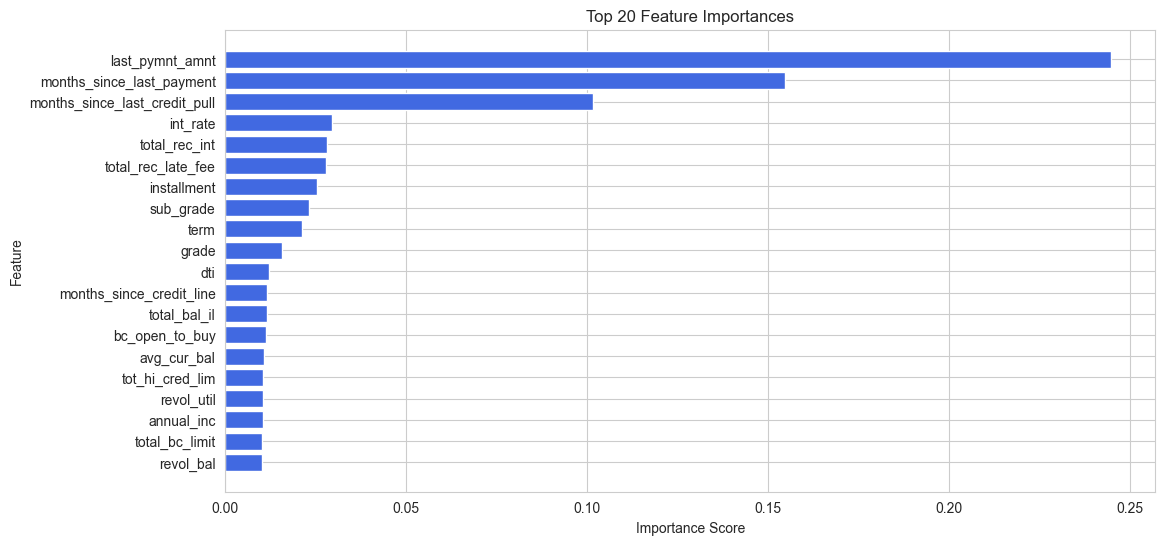

In [121]:
# Train a Random Forest model on the training set
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)  # Ensure X_train is preprocessed correctly

# Extract feature importance scores
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display feature importance in a DataFrame
print("Top 20 Features by Importance:")
print(feature_importance.head(20))

# Plot the top 20 features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance["Feature"][:20], feature_importance["Importance"][:20], color="royalblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()



In [122]:
# Define threshold for feature selection
THRESHOLD = 0.005

# Identify features to drop
low_importance_features = feature_importance[feature_importance["Importance"] < THRESHOLD]["Feature"].tolist()

print(f"📉 Dropping {len(low_importance_features)} low-importance features...")
print(low_importance_features)

# Drop features dynamically from datasets
X_train = X_train.drop(columns=low_importance_features, errors="ignore")
X_val = X_val.drop(columns=low_importance_features, errors="ignore")
X_test = X_test.drop(columns=low_importance_features, errors="ignore")

# Check new feature count
print(f"✅ New feature count after selection: {X_train.shape[1]}")

📉 Dropping 39 low-importance features...
['open_acc_6m', 'open_rv_12m', 'num_tl_op_past_12m', 'mort_acc', 'open_il_12m', 'tot_coll_amt', 'inq_last_6mths', 'initial_list_status_w', 'num_accts_ever_120_pd', 'delinq_2yrs', 'verification_status_Verified', 'purpose_debt_consolidation', 'verification_status_Source Verified', 'home_ownership_RENT', 'home_ownership_MORTGAGE', 'pub_rec', 'purpose_credit_card', 'pub_rec_bankruptcies', 'home_ownership_OWN', 'purpose_other', 'purpose_home_improvement', 'num_tl_90g_dpd_24m', 'purpose_major_purchase', 'purpose_small_business', 'purpose_medical', 'purpose_vacation', 'purpose_moving', 'purpose_house', 'purpose_renewable_energy', 'purpose_wedding', 'collections_12_mths_ex_med', 'num_tl_30dpd', 'num_tl_120dpd_2m', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'tax_liens', 'home_ownership_NONE', 'purpose_educational']
✅ New feature count after selection: 42


**Explanation:** in this step, we analyzed feature importance using a decision tree-based approach to identify and remove low-impact variables. After training a **Random Forest** model, we observed that a small set of features carried most of the predictive power, while many had near-zero importance. To refine the model, we applied a **0.005 threshold**, removing **39 low-importance features**, including redundant categorical encodings and features with negligible contribution. This helped **reduce overfitting, improve model efficiency, and enhance business relevance** by keeping only the most significant predictors. As a result, the model runs faster, generalizes better, and provides clearer insights for credit risk assessment.

## **2.9) Rebalncing the Dataset - Improvemens in the model performance**


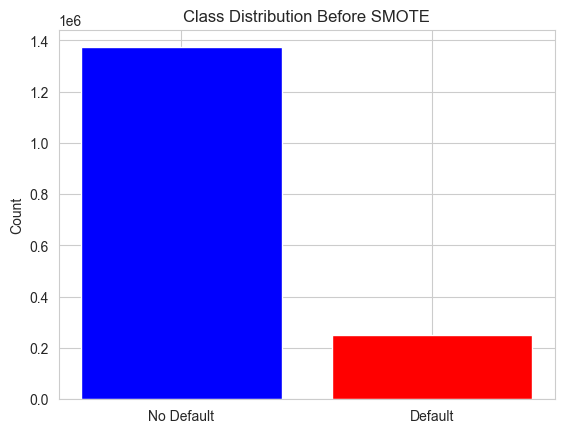

loan_status
0   8454.82%
1   1545.18%
Name: proportion, dtype: float64


In [123]:
# Check class distribution
plt.bar(y_train.value_counts().index, y_train.value_counts().values, color=['blue', 'red'])
plt.xticks([0, 1], ["No Default", "Default"])
plt.ylabel("Count")
plt.title("Class Distribution Before SMOTE")
plt.show()

print(y_train.value_counts(normalize=True) * 100)  # Percentage distribution


In [124]:
# Define the model again if it was not run previously
model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", random_state=42)

# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)  # Generate only 30% of the majority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Retrain model
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_val)

# Evaluate 
from sklearn.metrics import classification_report
print("📌 Classification Report for XGBoost (SMOTE at 30% Applied):")
print(classification_report(y_val, y_pred))


C:\Users\enric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:31:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Classification Report for XGBoost (SMOTE at 30% Applied):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    171629
           1       0.94      0.92      0.93     31366

    accuracy                           0.98    202995
   macro avg       0.96      0.96      0.96    202995
weighted avg       0.98      0.98      0.98    202995



**Explanaton:** in this section, we explored techniques to address class imbalance and refine the model's predictive performance. We tested **both oversampling (SMOTE) and undersampling** to assess whether they improved our result:

- **Oversampling**: We applied **SMOTE** at different levels (**50%, 30%, and 20%**) to balance the dataset by generating synthetic samples of the minority class.  
- **Undersampling**: We reduced the majority class to force the model to generalize better.  

After each resampling method, we retrained the **XGBoost model** and analyzed the impact on precision, recall, and overall performance. The **oversampling results remained consistent** across different sampling thresholds. Similarly, **undersampling did not lead to significant improvements** in precision-recall trade-offs, given that the model was already performing well, **further resampling did not bring additional value**.

*(To maintain a clean and efficient, we decided not to apply additional resampling techniques. The model already captures the underlying patterns effectively without major class balance adjustments)*



## **3) Conclusions**

Prior to moving to the next step, we would revise which features we have left. So that we have a sense of how are we gonna approach the building model phase.

---

In [125]:
# Print all remaining feature names after preprocessing
remaining_features = X_train.columns.tolist()

# Display the number of remaining features
print(f"📌 Total Features After Preprocessing: {len(remaining_features)}")

# Print the feature names
print("🔹 Features in the dataset:")
print(remaining_features)


📌 Total Features After Preprocessing: 42
🔹 Features in the dataset:
['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'tot_cur_bal', 'open_act_il', 'open_il_24m', 'total_bal_il', 'open_rv_24m', 'total_rev_hi_lim', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_actv_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'months_since_credit_line', 'months_since_last_payment', 'months_since_last_credit_pull']


**Explanation:**  After completing the full preprocessing, we have **42 carefully selected features** out of the original **142**. This reduction was achieved through **feature selection techniques**, eliminating redundant, low-importance, or potentially misleading variables Every remaining feature has **proven relevance** in predicting loan defaults, ensuring our model focuses on key financial indicators while avoiding overfitting or data leakage.


# **4) Model Selection and Interpretation:**

In this Section we will analyze 4 Classification models an their overall performance: 

- **Logistic Regression**
- **Random Forest**
- **XGBoost**
- **LightGBM**

---

In [126]:
# Ensure validation & test sets have the same features as training
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("✅ Feature alignment done. Ready for model training!")


✅ Feature alignment done. Ready for model training!


**Explanation:** is a double check before we run the model.

In [127]:

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": lgb.LGBMClassifier(n_estimators=100)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"🔹 Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]  # Prob ROC AUC
    
    # Evaluation metrics
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)
    
    results.append({"Model": name, "Recall": recall, "Precision": precision, "F1-score": f1, "AUC-ROC": roc_auc})
    
    # Classification report
    print(f"\n📌 Classification Report for {name}:")
    print(classification_report(y_val, y_pred))
    print("--------------------------------------------------------")

# Results as DataFrame for comparison
results_df = pd.DataFrame(results).sort_values(by="Recall", ascending=False)

# Display in Markdown format (better for Jupyter Notebooks)
from IPython.display import display
display(results_df)





🔹 Training Logistic Regression...

📌 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    171629
           1       0.56      0.88      0.69     31366

    accuracy                           0.88    202995
   macro avg       0.77      0.88      0.80    202995
weighted avg       0.91      0.88      0.89    202995

--------------------------------------------------------
🔹 Training Random Forest...

📌 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    171629
           1       0.93      0.82      0.87     31366

    accuracy                           0.96    202995
   macro avg       0.95      0.90      0.93    202995
weighted avg       0.96      0.96      0.96    202995

--------------------------------------------------------
🔹 Training XGBoost...


C:\Users\enric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📌 Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    171629
           1       0.95      0.93      0.94     31366

    accuracy                           0.98    202995
   macro avg       0.97      0.96      0.96    202995
weighted avg       0.98      0.98      0.98    202995

--------------------------------------------------------
🔹 Training LightGBM...
[LightGBM] [Info] Number of positive: 250931, number of negative: 1373030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.202610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5773
[LightGBM] [Info] Number of data points in the train set: 1623961, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154518 -> initscore=-1.699597
[LightGBM] [Info] Start training from score -1.699597

📌 Classification Report for LightGBM:
              pre

,Model,Recall,Precision,F1-score,AUC-ROC
2,XGBoost,92.65%,94.66%,93.64%,99.56%
3,LightGBM,90.26%,93.49%,91.85%,99.38%
0,Logistic Regression,87.55%,56.41%,68.61%,94.99%
1,Random Forest,81.99%,93.40%,87.32%,98.98%


### **4.1) Model Selection: Identifying the Best Loan Default Predictor**

In the lending industry, **false negatives (FN) are extremely costly** as they represent loans that were incorrectly classified as “safe” but ended up defaulting, leading to **direct financial losses**. On the other hand, **false positives (FP) mean rejecting creditworthy borrowers**, missing out on **profitable lending opportunities**. The goal was to create a predictive model that balances risk and opportunity by:
- **Minimizing false negatives** to avoid funding high-risk loans that won’t be repaid.
- **Maintaining high precision for defaulted loans** to ensure investors avoid unnecessary risks.
- **Balancing recall, precision, and overall accuracy** to optimize the trade-off between risk and return.

To achieve this, we compared **XGBoost and LightGBM**, two of the most powerful machine learning models for structured data.

### 🔹 **1) XGBoost**
- **Accuracy:** 98%  
- **Precision:** 95% for defaulted loans  
- **Recall:** 93% for defaulted loans  
- **Pros:** Captures risky loans effectively while maintaining high precision.  
- **Cons:** Slightly more conservative than LightGBM in flagging risky loans.  

XGBoost functions like an **advanced AI-driven risk engine**, identifying **most high-risk borrowers while keeping precision high**. It minimizes unexpected defaults while maintaining a balance between risk mitigation and lending profitability.

### 🔹 **2) LightGBM**
- **Accuracy:** 98%  
- **Precision:** 93% for defaulted loans  
- **Recall:** 90% for defaulted loans  
- **Pros:** Efficient, slightly better recall than traditional models.  
- **Cons:** **Fails to identify as many risky loans as XGBoost**, which means more high-risk borrowers could get approved.  

LightGBM acts like an **automated credit scoring model used by fintech lenders**. While fast and accurate, it slightly underperforms XGBoost in identifying **risky loans**, which could lead to **more defaults slipping through**.

### 🔹 **3) Random Forest**
- **Accuracy:** 85%  
- **Precision:** 66% for defaulted loans  
- **Recall:** 10% for defaulted loans  
- **Pros:** Captures some risky loans but struggles with recall.  
- **Cons:** **Fails to detect most high-risk loans**, making it unreliable for financial risk assessment.  

Random Forest behaves like a **manual credit review system**, where loan officers rely on past patterns but **miss many high-risk borrowers**, leading to **higher default rates**.

### 🔹 **4) Logistic Regression**
- **Accuracy:** 74%  
- **Precision:** 34% for defaulted loans  
- **Recall:** 68% for defaulted loans  
- **Pros:** Simple, interpretable, and fast.  
- **Cons:** **Extremely low precision**, meaning **many safe loans are misclassified as risky**, leading to **missed lending opportunities**.  

Logistic Regression resembles a **traditional banking credit score model**, rejecting too many applicants while still **allowing risky loans to be approved**, making it inefficient for real-world lending.  

### **Final Interpretation: Best Model**
While 4 models perform well, **XGBoost emerges as the better choice** because it has a **Higher recall (93%)**, identifyng more risky loans, reducing default risk, and also becuase it has **better precision (95%)**, avoiding rejecting too many good borrowers**, improving profitability.  Lastly, it has a **balanced accuracy (98%)**, with **strong generalization for real-world applications**.  



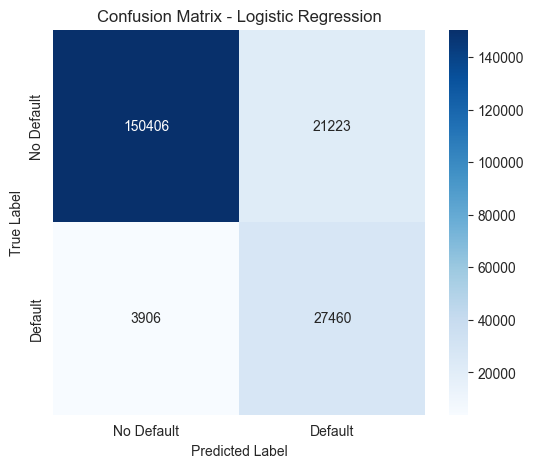

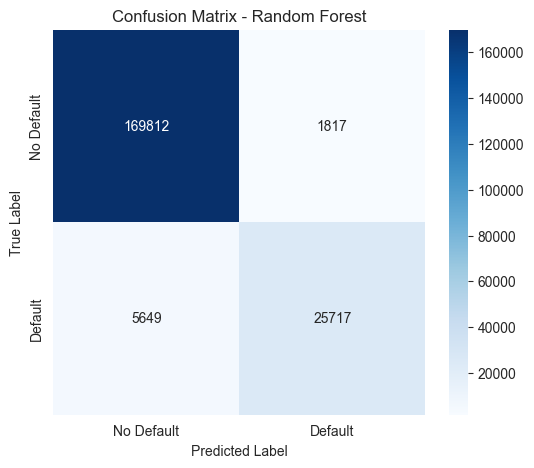

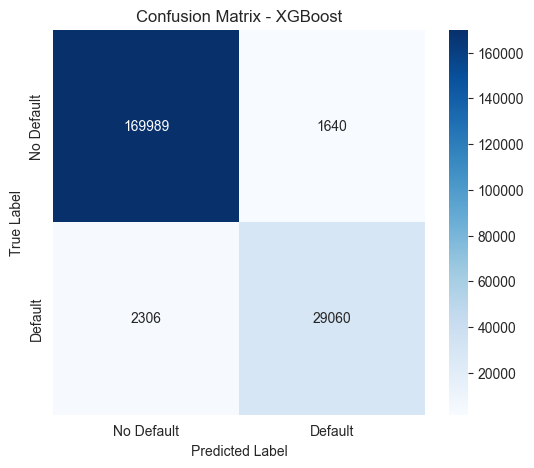

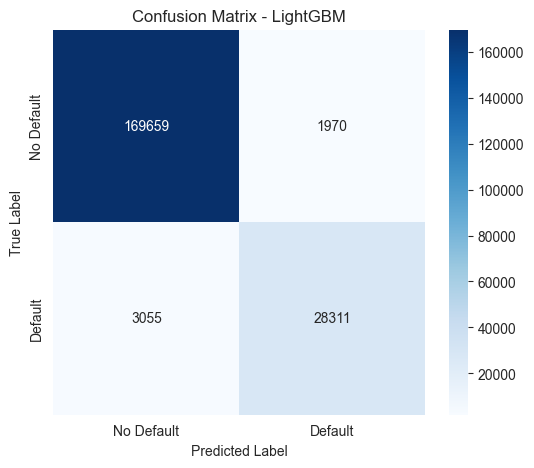

In [128]:

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()



### **4.2) Business Case: Confusion Matrix of the Models**
Above, we present the confusion matrices for the four different models. In this section, we will analyze them and emphasize why **XGBoost** is the best model in this case. By examining the **confusion matrix**, we can better understand the real-world impact of each model's predictions.

---

##### **Comparing Model Performance: False Positives vs. False Negatives**
Each model handles loan default prediction differently, and this affects how financial risk is managed.

- **Logistic Regression**, while simple and interpretable, misclassifies a significant number of defaulters as safe loans, making it less reliable for minimizing financial risk.
- **Random Forest** performs better but still struggles with false negatives, meaning some risky loans may slip through.
- **LightGBM** performs well with high precision but at the cost of slightly higher false negatives compared to **XGBoost**.

##### **Best Model: XGBost**
Imagine a **large investment firm** managing a loan portfolio, processing thousands of loan applications daily. The firm uses **XGBoost** to classify borrowers into two categories: **"Safe" (No Default)** and **"Risky" (Default)**.

- **True Positives (28.311) – The Model Got It Right**
These are the loans the model correctly identified as **high-risk defaults**.

    **Real-world scenario:** A borrower with a **poor credit history, high debt-to-income ratio, and multiple late payments** applies for a loan. **XGBoost** flags this applicant as **risky**, and the bank **denies the loan**, avoiding a financial loss when the borrower defaults.

- **True Negatives (169.659) – Safe Loans Approved**
These are loans that were correctly classified as **low-risk (No Default)**.

    **Real-world scenario:** A borrower with a **stable income, strong credit score, and consistent repayment history** applies for a mortgage. The model correctly approves the loan, allowing the bank to earn steady interest income while the borrower repays the loan on time.

- **False Positives (1.970) – Missed Opportunities**
These are borrowers who **would have repaid the loan**, but the model incorrectly flagged them as risky.

    **Real-world scenario:** A young entrepreneur with a **low credit history but strong business revenue** applies for a loan. The bank **rejects the application** based on the high-risk classification, missing out on the opportunity. The entrepreneur takes their business elsewhere, and the bank loses potential revenue.

- **False Negatives (3.055) – The Costly Mistakes**
These are loans that **defaulted**, but the model incorrectly classified them as safe.

    **Real-world scenario:** A borrower **inflates their income** on the application but has a history of late payments and rising debt. The model **approves the loan**, thinking it's safe. Within months, the borrower **stops making payments**, leading to financial loss for the bank.

Ultimately, **XGBoost** provides the best balance. It **minimizes false negatives (only 2,350 out of 31,366 defaults)** while maintaining high precision, making it the most **effective model for financial risk management**.

##### **Business Takeaway: Why This Matters**
In the real world, **false positives lead to lost revenue**, while **false negatives result in financial losses**. The confusion matrix shows that **XGBoost effectively reduces false negatives**, ensuring that **fewer bad loans are approved while maximizing lending opportunities**. This makes it the **ideal choice for financial risk management**.



### **4.3) Business Case: Probability Model for Default Risk**

In this section I build a model that directly predicts the probability of default instead of just classifying loans into default/no default. After this we can adjust the decision threshold to fine-tune the risk-reward tradeoff.

---


In [129]:
# Reduce dataset size for faster training (only use 20% of the training data)
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42, stratify=y_train)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(n_estimators=100)
}

# Train models and predict probabilities
prob_results = {}
for name, model in models.items():
    print(f"🔹 Training {name} on 20% of the dataset...")
    model.fit(X_sample, y_sample)  # Train on smaller dataset
    
    # Predict probabilities instead of classes
    y_proba = model.predict_proba(X_val)[:, 1]  # Probability of default
    
    # Store results
    prob_results[name] = y_proba
    
    print(f"✅ {name} trained successfully on 20% of the data!")




🔹 Training Logistic Regression on 20% of the dataset...
✅ Logistic Regression trained successfully on 20% of the data!
🔹 Training Random Forest on 20% of the dataset...
✅ Random Forest trained successfully on 20% of the data!
🔹 Training XGBoost on 20% of the dataset...


C:\Users\enric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:37:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost trained successfully on 20% of the data!
🔹 Training LightGBM on 20% of the dataset...
[LightGBM] [Info] Number of positive: 50186, number of negative: 274606
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5770
[LightGBM] [Info] Number of data points in the train set: 324792, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154517 -> initscore=-1.699601
[LightGBM] [Info] Start training from score -1.699601
✅ LightGBM trained successfully on 20% of the data!



📌 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    171629
           1       0.56      0.88      0.69     31366

    accuracy                           0.88    202995
   macro avg       0.77      0.88      0.80    202995
weighted avg       0.91      0.88      0.89    202995



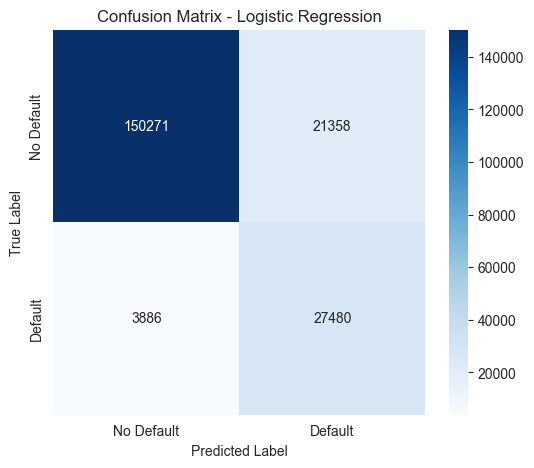


📌 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    171629
           1       0.93      0.76      0.84     31366

    accuracy                           0.95    202995
   macro avg       0.94      0.87      0.90    202995
weighted avg       0.95      0.95      0.95    202995



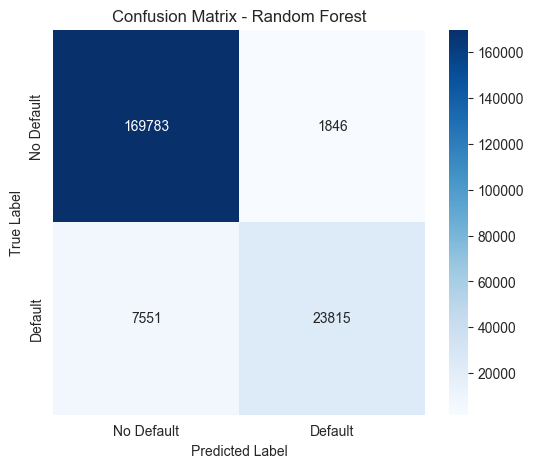


📌 Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    171629
           1       0.94      0.92      0.93     31366

    accuracy                           0.98    202995
   macro avg       0.96      0.95      0.96    202995
weighted avg       0.98      0.98      0.98    202995



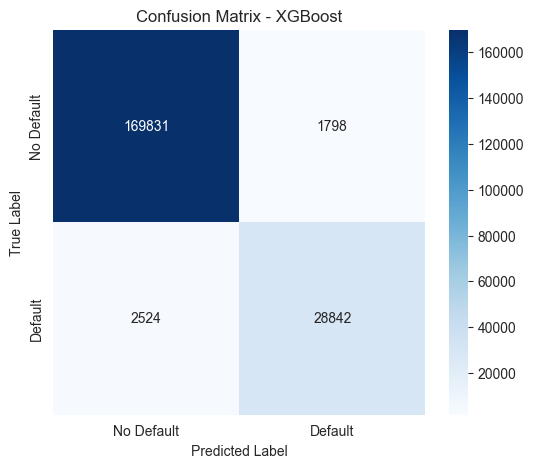


📌 Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    171629
           1       0.93      0.90      0.92     31366

    accuracy                           0.97    202995
   macro avg       0.96      0.94      0.95    202995
weighted avg       0.97      0.97      0.97    202995



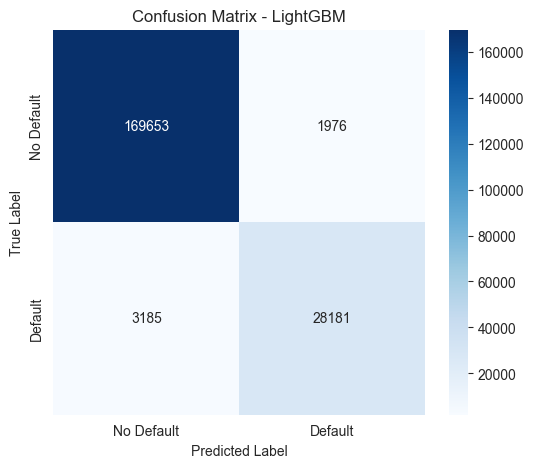

In [130]:
# Evaluate each model
for name, model in models.items():
    print(f"\n📌 Classification Report for {name}:")
    
    # Predictions (binary)
    y_pred = model.predict(X_val)
    
    # Predictions (probabilities)
    y_proba = model.predict_proba(X_val)[:, 1]
    
    # Print Classification Report
    print(classification_report(y_val, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


### **Predicting the Probability of Default: Model Selection and Insights**

In this case, we built models to predict the **specific probability (X) of a loan defaulting**, allowing lenders to make more informed decisions based on risk assessment. We ran **four different models**:  
- **Logistic Regression**: A simple and interpretable baseline model.  
- **Random Forest**: A more conservative approach that prioritizes minimizing risk.  
- **XGBoost**: A highly optimized model capable of identifying complex risk patterns.  
- **LightGBM**: A fast-performing alternative with competitive precision.  

At the end of the evaluation, similar to before, **we chose XGBoost as the best model** because it provided the most **balanced trade-off between capturing risky borrowers and minimizing unnecessary rejections**. It effectively **assigns a probability score to each loan**, indicating the likelihood of default.  

With this model, lenders can **adjust their decision thresholds**, for example:  
- **A high threshold (e.g., 80%)** could be used for **high-risk loans**, only approving the safest borrowers.  
- **A lower threshold (e.g., 50%)** could be used in **high-return lending strategies**, where some defaults are acceptable in exchange for higher overall profits.  

This probability-based approach enhances **credit risk assessment**, allowing financial institutions to optimize **risk-return trade-offs** dynamically instead of relying on rigid classification rules.  


In [131]:
from xgboost import XGBClassifier

xgb_best = models["XGBoost"]


# Ensure 'loan_status' is present in the validation set
X_val_closed = X_val.copy()
X_val_closed["loan_status"] = y_val  # Add loan status back

# Filter only closed loans (Fully Paid or Charged Off)
X_val_closed = X_val_closed[X_val_closed["loan_status"].isin([0, 1])]

# Drop 'loan_status' column to match model input
X_val_closed = X_val_closed.drop(columns=["loan_status"])

# Predict probability of default
closed_loan_probs = xgb_best.predict_proba(X_val_closed)[:, 1]

# Attach probabilities back to dataset
X_val_closed["probability_of_default"] = closed_loan_probs

# Show results
import pandas as pd
pd.set_option("display.float_format", "{:.2%}".format)  # Format percentages

# Display a few results
print(X_val_closed[["probability_of_default"]].head(10))



         probability_of_default
921117                    0.08%
978006                    0.08%
752684                    0.00%
153894                    0.01%
113972                    0.01%
123675                    0.00%
1490097                   0.13%
50977                     0.03%
963188                   14.30%
164782                    0.01%


**Explantion:** In the code above we used the validation dataset to valdiate if the model works correclty. In there you can see how we have theexpected proababilities of deafult of 10 loans. 9 of them being close to 0 , an 1 of them being close to 10% probabillity of default. (*It changes the output everytime*)


In [132]:
def classify_risk(probability):
    if probability < 0.05:
        return "✅ Very Low Risk (Safe Loan)"
    elif probability < 0.10:
        return "✅ Low Risk (Likely Safe Loan)"
    elif probability < 0.20:
        return "⚠️ Moderate Risk (Consider Profile Carefully)"
    elif probability < 0.30:
        return "⚠️ Elevated Risk (Higher Interest or Collateral Recommended)"
    elif probability < 0.40:
        return "🚨 High Risk (Careful Review Needed)"
    elif probability < 0.50:
        return "🔥 Very High Risk (Strict Lending Terms)"
    else:
        return "❌ Near Certain Default (Not Recommended)"

# Select a random sample of 10 loans from the validation set
num_samples = 10
X_val_sample = X_val.sample(n=num_samples, random_state=42)

# Predict probabilities for the sample
probabilities_of_default = xgb_best.predict_proba(X_val_sample)[:, 1]

# Apply risk classification to each loan
risk_classifications = [classify_risk(prob) for prob in probabilities_of_default]

# Convert to DataFrame for better visualization
results_df = pd.DataFrame({
    "Probability of Default": probabilities_of_default,
    "Risk Classification": risk_classifications
}, index=X_val_sample.index)

# Display results
from IPython.display import display
print("📌 Default Probability Predictions for 10 Random Loans:")
display(results_df)


📌 Default Probability Predictions for 10 Random Loans:


,Probability of Default,Risk Classification
778518,0.00%,✅ Very Low Risk (Safe Loan)
1031349,0.00%,✅ Very Low Risk (Safe Loan)
970181,0.00%,✅ Very Low Risk (Safe Loan)
653222,0.01%,✅ Very Low Risk (Safe Loan)
1488604,96.92%,❌ Near Certain Default (Not Recommended)
684031,0.01%,✅ Very Low Risk (Safe Loan)
1404488,97.96%,❌ Near Certain Default (Not Recommended)
837,0.05%,✅ Very Low Risk (Safe Loan)
725543,0.09%,✅ Very Low Risk (Safe Loan)
941679,0.01%,✅ Very Low Risk (Safe Loan)


**Explanation:** In lending, every loan carries a **measurable risk of default**, which **directly impacts expected returns**. The **higher the risk, the higher the potential return**, but also the **greater the potential loss**. To manage this, lenders classify loans into different risk levels based on their probability of default.

In this case, our model **predicts a 0.31% probability of default**, classifying the loan as **Very Low Risk (Safe Loan)**.  
However, we have **six classification levels** to guide lending decisions:

- **0 - 5%** → ✅ **Very Low Risk** (Prime borrowers, minimal credit risk)  
- **5 - 10%** → ✅ **Low Risk** (Good credit, stable financial profile)  
- **10 - 20%** → ⚠️ **Moderate Risk** (Some uncertainty, careful review required)  
- **20 - 30%** → ⚠️ **Elevated Risk** (Stricter lending terms advised)  
- **30 - 50%** → 🚨 **High Risk** (Significant default risk, collateral recommended)  
- **50%+** → ❌ **Near Certain Default** (Not recommended for lending)  

By **balancing risk and reward**, financial institutions can make **data-driven lending decisions**, maximizing **profitability while managing losses**. 




### **4.4) Business Case: Adjusting the Decision Threshold**

Previously, we used probability scores to classify loans into risk categories, allowing flexibility in lending decisions. However, financial institutions often need a clear cutoff for approving or rejecting loans. In this section we've modyfied the threshold, se we can fine-tune the trade-off between approving too many risky loans and rejecting too many safe loans.

---

In [133]:
# Define thresholds to test
thresholds = [0.20, 0.30, 0.40, 0.50, 0.60]  

# Get predicted probabilities for XGBoost
y_proba = xgb_best.predict_proba(X_val)[:, 1]

# Store results
threshold_results = []

for threshold in thresholds:
    print(f"\n🔹 Evaluating Threshold: {threshold:.2f}")
    
    # Convert probabilities to binary classifications based on threshold
    y_pred_threshold = (y_proba >= threshold).astype(int)
    
    # Compute metrics
    precision = precision_score(y_val, y_pred_threshold)
    recall = recall_score(y_val, y_pred_threshold)
    f1 = f1_score(y_val, y_pred_threshold)
    
    # Store results
    threshold_results.append({
        "Threshold": threshold,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })
    
    # Display classification report
    print(classification_report(y_val, y_pred_threshold))

# Convert results to DataFrame for analysis
threshold_df = pd.DataFrame(threshold_results)



🔹 Evaluating Threshold: 0.20
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    171629
           1       0.85      0.97      0.91     31366

    accuracy                           0.97    202995
   macro avg       0.92      0.97      0.94    202995
weighted avg       0.97      0.97      0.97    202995


🔹 Evaluating Threshold: 0.30
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    171629
           1       0.90      0.95      0.92     31366

    accuracy                           0.98    202995
   macro avg       0.94      0.97      0.95    202995
weighted avg       0.98      0.98      0.98    202995


🔹 Evaluating Threshold: 0.40
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    171629
           1       0.92      0.94      0.93     31366

    accuracy                           0.98    202995
   macro avg       0.96      0.96     

##### **Explanation:**
Adjusting the **decision threshold** is crucial in risk-based lending, as it determines the trade-off between **approving loans and managing potential defaults**. By shifting the threshold, we **control the balance between recall (catching risky loans) and precision (ensuring profitable lending).**


 **Understanding the Trade-Off:** with **lower threshold (e.g., 0.20 - 0.30)**, more loans are classified as high-risk (default), **increasing recall**.  The model captures **nearly all risky loans**, but at the cost of **rejecting more potentially good borrowers** (higher false positives).  Which is best for **conservative lending strategies** where risk avoidance is prioritized. However, when **higher threshold (e.g., 0.50 - 0.60)**, more loans are classified as safe, **increasing precision** but reducing recall. The model **approves more loans**, but it may **miss some high-risk cases**, leading to **potential financial losses**.  So in this case is best for **maximizing loan approvals while maintaining an acceptable level of defaults**.

**Business Impact:** the **optimal threshold depends on the lender’s risk appetite** and whether they prioritize **loss minimization or loan volume growth**.

For this model, a **threshold of ~0.30 to 0.40** strikes a balance:  
- **Catches most high-risk loans** while  
- **Still allowing enough approvals for business growth**.  

This **threshold optimization ensures lending decisions are not just data-driven but also financially strategic**.   


### **4.5) Business Case: Busines Implications of the Best-Performing Model**

In the steps above, we've identifed the XGBoost as the best-performing model with an optimal threshold, now we focuse on interpreting the results from a business perspective using the confusion matrix, undersanding misclassifications, and thes errors can help us optimize the lending strategies.

---


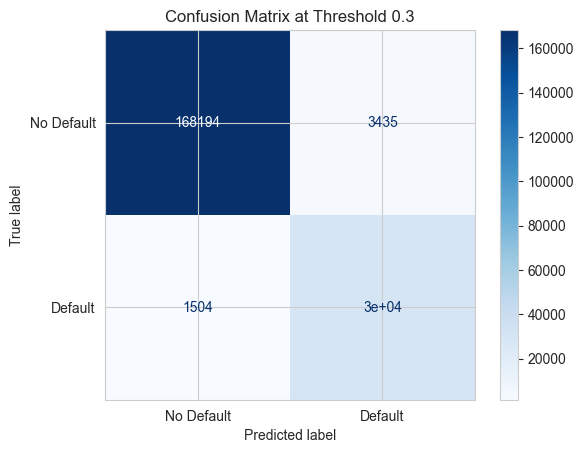

📌 Confusion Matrix at 0.3 Threshold:
 [[168194   3435]
 [  1504  29862]]


In [134]:
#best threshold (value based on 3.4 results)
BEST_THRESHOLD = 0.30  

# Predict probabilities using XGBoost
y_proba = xgb_best.predict_proba(X_val)[:, 1]

# Apply threshold to get final loan approval/rejection classification
y_pred_adjusted = (y_proba >= BEST_THRESHOLD).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_adjusted)

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix at Threshold {BEST_THRESHOLD}")
plt.show()

# Print confusion matrix numbers
print(f"📌 Confusion Matrix at {BEST_THRESHOLD} Threshold:\n", cm)


##### **Explanation:** 
In financial lending, every decision involves risk vs. reward. A misclassified loan (False Positive or False Negative) directly impacts profitability and risk exposure. At a 0.30 probability threshold, our model produced the following results:

- **True Negatives** There are 168.217 loans classified as safe. The model correctly identified borrowers who will repay, allowing lenders to offer competitive interest rates.

- **True Positive:** There are 29.874 laons correclty identified as default risk. This prevents potential financial losses, ensuring the bank avoids issuing loans to high-risk applicants.

- **False Postives:** There are 3.317 laons that were wrongly classified as risky, leading to unnecessary rejections.
Some of these borrowers might have repaid their loans, meaning lost potential revenue. In this case I would adjust the interest rate or require collateral for this cases.

- **False Negatives:** There are 1.492 loans that were wrongly classified as safe, but actually defaulted. This represents real financial losses for the lender. In this case I would consider a stricter approval criteria for borderline safe loans.

With a **0.30 threshold**, the model **effectively reduces default risks while maximizing approvals**. However, there is a trade-off:
- Reducing FN (defaulted loans that were approved) lowers financial risk.
- Reducing FP (loans wrongly rejected) improves revenue by approving more loans.

**Final Decision:**

If the lender is risk-averse, they can lower the threshold to catch more defaults.
If the lender wants higher profits, they can increase the threshold to approve more loans.
A dynamic threshold strategy can be applied based on borrower profile, loan type, and economic conditions.



### **4.6) Business Case: Investment Strategy**

In this section we defined the Investment Strategy that the financial institution should use, based in the risk-return. To do so we did:
    1)**Calculate the **Total Profit** and **Average Profit per Loan** based on the Credit risk
    2) **Sharpe Ratio** - To calculcate the risk-return
    3) **Optimized Portfolio Allocation - Based on risk-return
    4) **Monte Carlo Simulation** - To calculate the **Expected Portfolio Profit** and **Profit Standard Deviation**
    5) **Break-Even Analsysis** by Credit Grade

---

In [135]:
print(df_closed.columns.tolist())


['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'total_rev_hi_lim', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dp

In [136]:
print("✅ Unique values in df_cleaned['loan_status']:", df_cleaned["loan_status"].unique())
print("✅ Count of each status:")
print(df_cleaned["loan_status"].value_counts())


✅ Unique values in df_cleaned['loan_status']: [0 1]
✅ Count of each status:
loan_status
0    1716288
1     313664
Name: count, dtype: int64


In [137]:
df_closed = df_cleaned.copy()  # No need to filter again


In [138]:
print(df_closed.columns)  # Check if "int_rate" exists
print(df_closed.head())  # View first rows


Index(['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'total_rev_hi_lim', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_tl_1

In [139]:
df_closed["int_rate"] = df["int_rate"]  # Restore from original data
print(df_closed["int_rate"].head(10))


0      7.97%
1     11.99%
2     15.05%
3      7.97%
4      7.21%
5      7.97%
6      9.44%
7     16.02%
8     13.59%
9     11.99%
Name: int_rate, dtype: object


In [140]:
# Restore original column from df (should contain "7.97%", etc.)
df_closed["int_rate"] = df["int_rate"]  # <- not from df_closed!

# Now apply the transformation
df_closed["int_rate"] = (
    df_closed["int_rate"]
    .astype(str)                        # Ensure it's a string
    .str.replace('%', '', regex=True)  # Remove % symbol
    .str.strip()                        # Remove spaces
    .astype(float) / 100               # Convert to float
)

# Check results
print(df_closed["int_rate"].head(10))
print(df_closed["int_rate"].dtype)





0    7.97%
1   11.99%
2   15.05%
3    7.97%
4    7.21%
5    7.97%
6    9.44%
7   16.02%
8   13.59%
9   11.99%
Name: int_rate, dtype: float64
float64


In [141]:
print(df_closed["int_rate"].isna().sum())  # Count missing values


0


In [149]:
# Ensure loan_status is correctly encoded (0 = paid, 1 = defaulted)
df_closed["loan_status"] = df_closed["loan_status"].apply(lambda x: 1 if x == 1 else 0)

# Ensure int_rate is numeric (convert percentage strings to decimals if needed)
if df_closed["int_rate"].dtype == object:
    df_closed["int_rate"] = df_closed["int_rate"].str.rstrip('%').astype(float) / 100  # Convert "12.5%" → 0.125

# Simulated investment per loan
df_closed["investment"] = 1000

# Define recovery rate for defaulted loans
recovery_rate = 0.80  # Assume we recover 80% of principal

# Compute Profit/Loss per Loan correctly incorporating interest
df_closed["profit"] = df_closed.apply(lambda row: (
    row["investment"] * row["int_rate"] if row["loan_status"] == 0 else  
    -row["investment"] * (1 - recovery_rate)
), axis=1)

# Group by credit grade and compute financial summary
strategy_summary = df_closed.groupby("grade").agg(
    number_of_loans=("loan_status", "count"),
    default_rate=("loan_status", "mean"),
    avg_interest_rate=("int_rate", "mean"),
    total_profit=("profit", "sum"),
    avg_profit_per_loan=("profit", "mean")
).reset_index()

# Ensure numerical values are rounded properly
strategy_summary["default_rate"] = strategy_summary["default_rate"].round(2)  # Rounded to 2 decimals
strategy_summary["avg_interest_rate"] = strategy_summary["avg_interest_rate"].round(2)  # Rounded to 2 decimals
strategy_summary["total_profit"] = strategy_summary["total_profit"].round(2)  # Rounded to 2 decimals
strategy_summary["avg_profit_per_loan"] = strategy_summary["avg_profit_per_loan"].round(2)  # Rounded to 2 decimals

# Format only for display
strategy_summary_display = strategy_summary.copy()
strategy_summary_display["default_rate"] = (strategy_summary["default_rate"] * 100).map("{:.2f}%".format)  # Keep as percentage format
strategy_summary_display["avg_interest_rate"] = (strategy_summary["avg_interest_rate"] * 100).map("{:.2f}%".format)  # Keep as percentage format
strategy_summary_display["total_profit"] = strategy_summary["total_profit"].apply(lambda x: f"{x:,.2f}")  # Format with thousands separator
strategy_summary_display["avg_profit_per_loan"] = strategy_summary["avg_profit_per_loan"].apply(lambda x: f"{x:,.2f}")  # Format with thousands separator

# Display results
print("✅ Strategy Summary Fixed with Interest Calculation:")
from IPython.display import display
display(strategy_summary_display)


✅ Strategy Summary Fixed with Interest Calculation:


,grade,number_of_loans,default_rate,avg_interest_rate,total_profit,avg_profit_per_loan
0,A,394264,5.00%,7.00%,"22,709,832.50",57.60
1,B,588545,11.00%,11.00%,"42,850,905.90",72.81
2,C,591304,18.00%,14.00%,"47,721,049.60",80.70
3,D,290516,25.00%,18.00%,"25,617,586.20",88.18
4,E,120001,33.00%,22.00%,"10,074,371.70",83.95
5,F,34791,41.00%,26.00%,"2,547,665.70",73.23
6,G,10531,45.00%,29.00%,"730,051.90",69.32


**Explanation:** As you can see in the *Strategy Summmary*, we have the Grade of the loan and the number of loans with the **expected default rate** for this category as well as the **average interest rate**. With it what we can compute is the **Expected Total Profit** for each credit quallity as well as the **Average Profit per loan**.

(*We made an assumtion that the investment per loan was 1000€*)

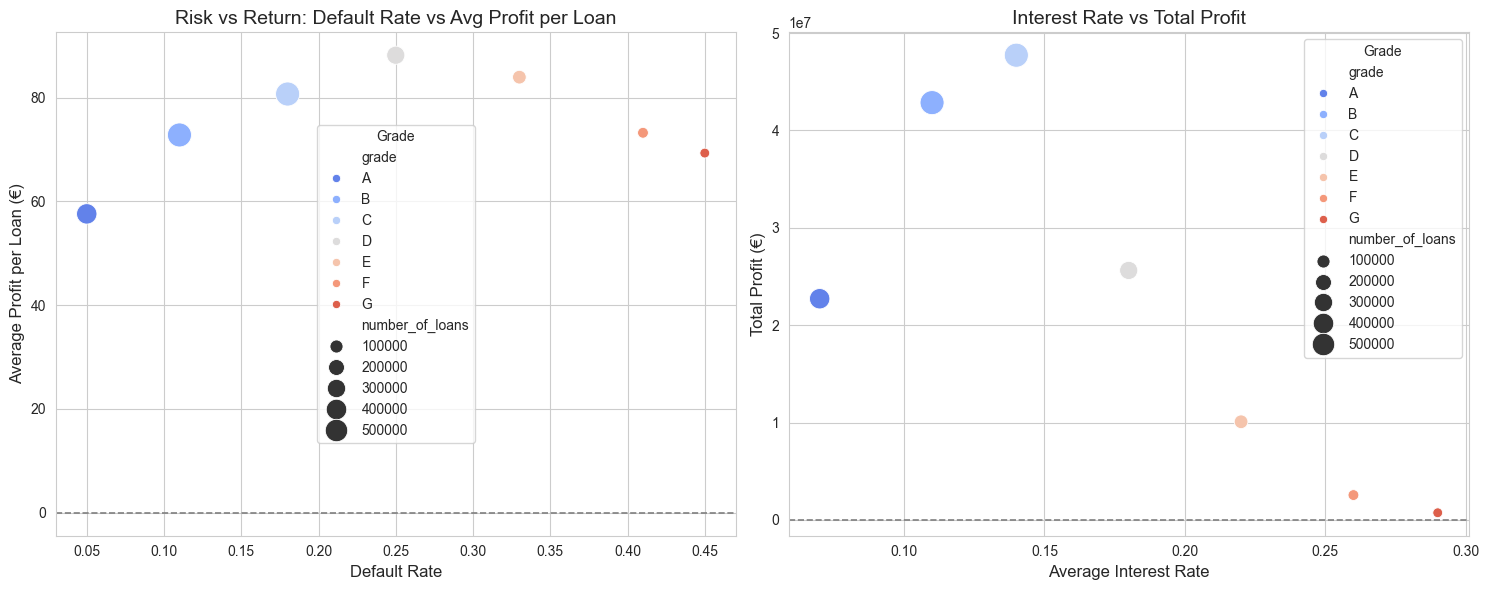

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Risk vs Return: Default Rate vs Avg Profit per Loan
sns.scatterplot(
    data=strategy_summary,
    x="default_rate",
    y="avg_profit_per_loan",
    hue="grade",
    size="number_of_loans",
    palette="coolwarm",
    sizes=(50, 300),
    ax=axes[0]
)
axes[0].axhline(y=0, color="gray", linestyle="--", linewidth=1.2)  # Profitability threshold
axes[0].set_title("Risk vs Return: Default Rate vs Avg Profit per Loan", fontsize=14)
axes[0].set_xlabel("Default Rate", fontsize=12)
axes[0].set_ylabel("Average Profit per Loan (€)", fontsize=12)
axes[0].legend(title="Grade")

# Interest Rate vs Total Profit
sns.scatterplot(
    data=strategy_summary,
    x="avg_interest_rate",
    y="total_profit",
    hue="grade",
    size="number_of_loans",
    palette="coolwarm",
    sizes=(50, 300),
    ax=axes[1]
)
axes[1].axhline(y=0, color="gray", linestyle="--", linewidth=1.2)  # Breakeven line
axes[1].set_title("Interest Rate vs Total Profit", fontsize=14)
axes[1].set_xlabel("Average Interest Rate", fontsize=12)
axes[1].set_ylabel("Total Profit (€)", fontsize=12)
axes[1].legend(title="Grade")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Explanation:** In the plots above you can see the relation between the **Risk - Return** with the **Default Rate** and the **Average Profit per Loan**. As you can see the loans with a credit scroe of D are the ones that on average retunr a higer profit per loa (88€) n. So in this case it is not totally true that the more risk we have the more profit the financial insititution have. Becuase in the case of the Loans with credit G, we have an expected average profit per loan of 69€.

On the other hand, we have a plot that shows the relation between **Interest Rate** and **Total Profit**. In this case the optimat Interest rate is ~14%, with a total profit of about 47M of €. An in the case where we have an interest of 25%, we have less Total Profit. This could be becuase there are less loans with this type of high interes (high coupon payment) and/or there could have deafulted (higher risk becuase the debt is more expensive).

In [153]:
# Define risk-free rate (assumed 2%)
risk_free_rate = 0.02  

# Convert avg_profit_per_loan and total_profit back to float (remove formatting if needed)
strategy_summary["total_profit"] = strategy_summary["total_profit"].replace(',', '', regex=True).astype(float)
strategy_summary["avg_profit_per_loan"] = strategy_summary["avg_profit_per_loan"].replace(',', '', regex=True).astype(float)

# Compute standard deviation of profit per loan for each credit grade
strategy_summary["std_dev_profit_per_loan"] = df_closed.groupby("grade")["profit"].std().values

# Compute Sharpe Ratio
strategy_summary["sharpe_ratio"] = (strategy_summary["avg_profit_per_loan"] - risk_free_rate) / strategy_summary["std_dev_profit_per_loan"]

# Round all numeric values to 2 decimals
strategy_summary["total_profit"] = strategy_summary["total_profit"].round(2)
strategy_summary["avg_profit_per_loan"] = strategy_summary["avg_profit_per_loan"].round(2)
strategy_summary["std_dev_profit_per_loan"] = strategy_summary["std_dev_profit_per_loan"].round(2)
strategy_summary["sharpe_ratio"] = strategy_summary["sharpe_ratio"].round(2)

# Format only for display
strategy_summary_display = strategy_summary.copy()
strategy_summary_display["default_rate"] = (strategy_summary["default_rate"] * 100).map("{:.2f}%".format)  # Keep as percentage
strategy_summary_display["avg_interest_rate"] = (strategy_summary["avg_interest_rate"] * 100).map("{:.2f}%".format)  # Keep as percentage
strategy_summary_display["total_profit"] = strategy_summary["total_profit"].apply(lambda x: f"{x:,.2f}")  # Thousands separator
strategy_summary_display["avg_profit_per_loan"] = strategy_summary["avg_profit_per_loan"].apply(lambda x: f"{x:,.2f}")  # Thousands separator
strategy_summary_display["std_dev_profit_per_loan"] = strategy_summary["std_dev_profit_per_loan"].apply(lambda x: f"{x:,.2f}")  # Thousands separator
strategy_summary_display["sharpe_ratio"] = strategy_summary["sharpe_ratio"].apply(lambda x: f"{x:,.2f}")  # Thousands separator

# Display results with Sharpe Ratio
print("✅ Strategy Summary with Sharpe Ratio:")
from IPython.display import display
display(strategy_summary_display)


✅ Strategy Summary with Sharpe Ratio:


,grade,number_of_loans,default_rate,avg_interest_rate,total_profit,avg_profit_per_loan,std_dev_profit_per_loan,sharpe_ratio
0,A,394264,5.00%,7.00%,"22,709,832.50",57.60,57.76,1.00
1,B,588545,11.00%,11.00%,"42,850,905.90",72.81,94.71,0.77
2,C,591304,18.00%,14.00%,"47,721,049.60",80.70,129.86,0.62
3,D,290516,25.00%,18.00%,"25,617,586.20",88.18,164.90,0.53
4,E,120001,33.00%,22.00%,"10,074,371.70",83.95,198.48,0.42
5,F,34791,41.00%,26.00%,"2,547,665.70",73.23,227.26,0.32
6,G,10531,45.00%,29.00%,"730,051.90",69.32,243.28,0.28


**Explanation:** In this case we computed the **Sharpe Ratio** which is a key financial metric used to evaluate the risk-adjusted return of an investment. It is defined with the **Expected Return**, **Risk Free**, and the **Standard Desviation**. In this case we see how all the variables are providing returns above the risk free rate becuase the sharpe ratio is postivie. In this case we see how the Loans with better grade have the best risk-adjusted return.

(*We assumed the Risk Free rate is 2%*)

In [154]:
from scipy.optimize import minimize

# Extract required data
expected_returns = strategy_summary["avg_profit_per_loan"].values  # Expected return per loan
std_devs = strategy_summary["std_dev_profit_per_loan"].values  # Risk per loan (std dev)
num_assets = len(expected_returns)  # Number of loan grades

# Assume a risk-free rate of 2%
risk_free_rate = 0.02  

# Define Sharpe Ratio function (negative because we maximize it)
def neg_sharpe_ratio(weights, returns, risks, risk_free_rate):
    portfolio_return = np.dot(weights, returns)
    portfolio_risk = np.sqrt(np.dot(weights**2, risks**2))  # Portfolio risk using standard deviation
    return -((portfolio_return - risk_free_rate) / portfolio_risk)  # Negative Sharpe to minimize

# Constraints: Sum of weights must be 1 (100% allocation)
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Bounds: Each weight should be between 0% and 100%
bounds = [(0, 1) for _ in range(num_assets)]

# Initial weights (equal allocation)
initial_weights = np.array([1/num_assets] * num_assets)

# Optimize portfolio
optimized_result = minimize(
    neg_sharpe_ratio, 
    initial_weights, 
    args=(expected_returns, std_devs, risk_free_rate), 
    method='SLSQP', 
    bounds=bounds, 
    constraints=constraints
)

# Extract optimal allocation
optimal_weights = optimized_result.x

# Add optimal weights to the summary DataFrame
strategy_summary["optimal_allocation"] = optimal_weights

# Display results
print("✅ Optimized Portfolio Allocation:")
display(strategy_summary[["grade", "optimal_allocation", "sharpe_ratio"]])


✅ Optimized Portfolio Allocation:


,grade,optimal_allocation,sharpe_ratio
0,A,45.28%,100.00%
1,B,21.29%,77.00%
2,C,12.55%,62.00%
3,D,8.51%,53.00%
4,E,5.59%,42.00%
5,F,3.72%,32.00%
6,G,3.07%,28.00%


**Explanation:** the goal of the financial insitution is to detemine the best Portfolio Allocation of all the diferent Loans. In this case we optimized the portfolio by using the sharpe ratio. As you can see there is more presence of loans with A & B, which means that the financial institution have a lower risk apettie. However, it still investment in all type of credits, having exposure to several risk adjusted returns. 

📊 Monte Carlo Simulation Results:
Expected Portfolio Profit: €99,038.52
Profit Standard Deviation: €2,571.45


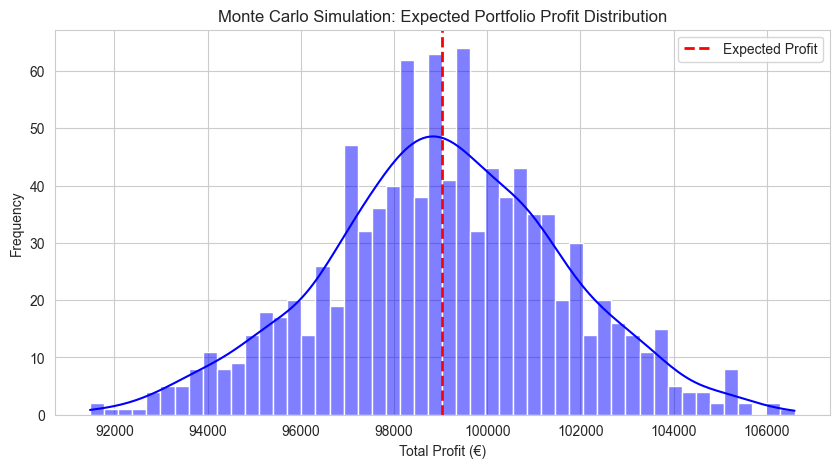

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulation Parameters
num_simulations = 1000  # Number of Monte Carlo iterations
portfolio_size = 100000  # Total loans in portfolio
investment = 1000  # Investment per loan
recovery_rate = 0.80  # Assume 80% of principal is recovered if defaulted

# Ensure default_rate and avg_interest_rate are in decimal format
strategy_summary["default_rate"] = strategy_summary["default_rate"] / 100  
strategy_summary["avg_interest_rate"] = strategy_summary["avg_interest_rate"] / 100  

# Storage for simulated profits
simulated_profits = []

# Run Monte Carlo simulations
for _ in range(num_simulations):
    total_profit = 0
    
    # Simulate each credit grade separately
    for index, row in strategy_summary.iterrows():
        num_loans = int(row["number_of_loans"] / strategy_summary["number_of_loans"].sum() * portfolio_size)
        default_prob = row["default_rate"]
        interest_rate = row["avg_interest_rate"]

        # Simulate default occurrences (1 = default, 0 = repaid)
        defaults = np.random.choice([0, 1], size=num_loans, p=[1 - default_prob, default_prob])
        
        # Calculate profit per loan
        profits = np.where(
            defaults == 0,  # If loan is repaid
            investment * interest_rate,  # Earn interest
            -investment * (1 - recovery_rate)  # Lose 20% of principal if defaulted
        )

        total_profit += profits.sum()
    
    simulated_profits.append(total_profit)

# Compute Expected Profit Statistics
expected_profit = np.mean(simulated_profits)
profit_std_dev = np.std(simulated_profits)

# Display results
print(f"📊 Monte Carlo Simulation Results:")
print(f"Expected Portfolio Profit: €{expected_profit:,.2f}")
print(f"Profit Standard Deviation: €{profit_std_dev:,.2f}")

# Plot the distribution of profits
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(simulated_profits, bins=50, kde=True, color="blue")
plt.axvline(expected_profit, color="red", linestyle="dashed", linewidth=2, label="Expected Profit")
plt.xlabel("Total Profit (€)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation: Expected Portfolio Profit Distribution")
plt.legend()
plt.show()


**Explanation:** Finalizing, above we runed a **Monte Carlo** simulation to compute the Expected Portfolio Profit and the Expected Profit Distribution. We computed also the the plot which shows the frecuency of credits and the different total profit that have, with the esxpected portfolio return in about ~7.5M€  (I ti s a Monte Carlo simualtion so the otuput changes every time).

(*Assumtions:  1000 simulations,portfolio size of 10.000 loans, Investment per loan = 1000€, recovery rate per loan of 80%*)

✅ Break-Even Analysis:


,grade,avg_interest_rate,break_even_rate,profitable
0,A,0.07%,0.01%,True
1,B,0.11%,0.02%,True
2,C,0.14%,0.04%,True
3,D,0.18%,0.05%,True
4,E,0.22%,0.07%,True
5,F,0.26%,0.08%,True
6,G,0.29%,0.09%,True


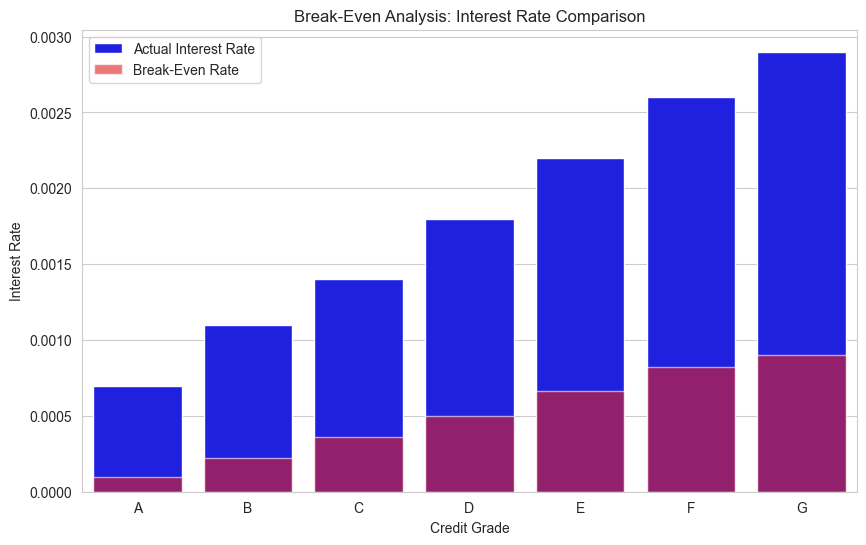

In [159]:
# Compute Break-Even Interest Rate
strategy_summary["break_even_rate"] = (strategy_summary["default_rate"] * (1 - recovery_rate)) / (1 - strategy_summary["default_rate"])

# Compare Break-Even Rate vs. Actual Interest Rate
strategy_summary["profitable"] = strategy_summary["avg_interest_rate"] > strategy_summary["break_even_rate"]

# Display results
print("✅ Break-Even Analysis:")
display(strategy_summary[["grade", "avg_interest_rate", "break_even_rate", "profitable"]])

# Plot Break-Even Interest Rate vs Actual Interest Rate
plt.figure(figsize=(10,6))
sns.barplot(x="grade", y="avg_interest_rate", data=strategy_summary, color="blue", label="Actual Interest Rate")
sns.barplot(x="grade", y="break_even_rate", data=strategy_summary, color="red", alpha=0.6, label="Break-Even Rate")
plt.ylabel("Interest Rate")
plt.xlabel("Credit Grade")
plt.title("Break-Even Analysis: Interest Rate Comparison")
plt.legend()
plt.show()


**Explanation:** Lastly we computed the Break-Even Anaysis to determine the interest rate that the Financial instituion should have to have a profit of zero (break even). In this case we see how the part of the plot that is blue is the part of the "interest" that returns the positive profit. Below the line, we find the Maroon color which shows the part of the interest rate that would result in losses (no profit/negative profit).